In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from numpy import nan as NA


In [2]:
#usar version 3.2.1 de matplotlib
import matplotlib
matplotlib.__version__

'3.1.1'

# P1 Carga y Limpieza de datos

### 1. Carga

Adjuntamos df.head() al final de cada cambio importante para vizualizar como se va modificando

In [3]:
#Carga de los datos

df_all_13 = pd.read_csv("../Tarea-1-Datos/data/raw/w13/metrocuadrado_all_w13.csv", engine='python')
df_furnished_13 = pd.read_csv("../Tarea-1-Datos/data/raw/w13/metrocuadrado_all_w13.csv", engine='python')
df_all_14 = pd.read_csv("../Tarea-1-Datos/data/raw/w14/metrocuadrado_all_w14.csv", engine='python')
df_furnished_14 = pd.read_csv("../Tarea-1-Datos/data/raw/w14/metrocuadrado_furnished_w14.csv", engine='python')
df_all_15 = pd.read_csv("../Tarea-1-Datos/data/raw/w15/metrocuadrado_all_w15.csv", engine='python')
df_furnished_15 = pd.read_csv("../Tarea-1-Datos/data/raw/w15/metrocuadrado_furnished_w15.csv", engine='python')
df_all_16 = pd.read_csv("../Tarea-1-Datos/data/raw/w16/metrocuadrado_all_w16.csv", engine='python')
df_furnished_16 = pd.read_csv("../Tarea-1-Datos/data/raw/w16/metrocuadrado_furnished_w16.csv", engine='python')
df_all_17 = pd.read_csv("../Tarea-1-Datos/data/raw/w17/metrocuadrado_all_w17.csv", engine='python')
df_furnished_17 = pd.read_csv("../Tarea-1-Datos/data/raw/w17/metrocuadrado_furnished_w17.csv", engine='python')


In [4]:
#Agregamos variable categórica que diga si viene o no de un archivo "furnished"

df_all_13['furnished']=0
df_all_14['furnished']=0
df_all_15['furnished']=0
df_all_16['furnished']=0
df_all_17['furnished']=0
df_furnished_13['furnished']=1
df_furnished_14['furnished']=1
df_furnished_15['furnished']=1
df_furnished_16['furnished']=1
df_furnished_17['furnished']=1


#generamos un sólo DataFrame

frames = [df_all_13, df_furnished_13, df_all_14, df_furnished_14, df_all_15, df_furnished_15, df_all_16, df_furnished_16, df_all_17, df_furnished_17]

df = pd.concat(frames)
df1 = df

#Eliminamos filas duplicadas

df = df.drop_duplicates(['property_type|rent_type|location', 'price', 'n_rooms', 'n_bath',
       'surface', 'details', 'url', 'metrocuadrado_index'])

#Reindexamos y ordenamos para mejorar la eficiencia

df = df.reset_index(drop=True)
df.sort_index(inplace=True)

#¿cuantas filas furnished no estaban repetidas?, serán las que venían de un archivo furnished y no fueron eliminadas
#al borrar los duplicados

print("El número de filas que venían de Furnished no repetidas es",len(df[df["furnished"]>0]))

df.head()

El número de filas que venían de Furnished no repetidas es 1947


,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE BogotÃ¡ D.C..",$1.050.000,3,2,63.0 m2,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",$3.930.000,3,2,100.0 m2,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",$750.000,3,1,90.0 m2,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0
3,"Casa en Arriendo, PARIS GAITAN BogotÃ¡ D.C..",$3.400.000,5,4,71.0 m2,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0
4,"Casa en Arriendo, BALCONES DE ORIENTE BogotÃ¡ ...",$1.560.000,4,3,96.0 m2,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0


### 2. Limpieza

In [5]:
### a.

#pasamos el precio de str a float

df["price"] = df["price"].replace('[\$,]', '', regex=True)
df["price"] = df["price"].replace('[\.,]', '', regex=True).astype(float)


#mismo ejercicio con la superficie y resto de columnas
df["surface"] = df["surface"].replace('[\ m2,]', '', regex=True).astype(float)


#si tiene más de 5 piezas o baños los agruparemos como que tienen 6
df["n_rooms"] = df["n_rooms"].replace('[\5+,]', '6', regex=True).astype(float)
df["n_bath"] = df["n_bath"].replace('[\5+,]', '6', regex=True).astype(float)

df.head()

,property_type|rent_type|location,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished
0,"Casa en Arriendo, LA SOLEDAD NORTE BogotÃ¡ D.C..",1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0
1,"Casa en Arriendo, CIUDAD SALITRE SUR-ORIENTAL ...",3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0
2,"Casa en Arriendo, VILLA DE LOS ALPES II SECTOR...",750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0
3,"Casa en Arriendo, PARIS GAITAN BogotÃ¡ D.C..",3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0
4,"Casa en Arriendo, BALCONES DE ORIENTE BogotÃ¡ ...",1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0


In [6]:
### b.

#Separamos la columna original en tres y luego la eliminamos

df["property_type"] = df['property_type|rent_type|location'].str.split(expand=True)[0]
df["property_type"] = df["property_type"].replace('[\,,]', '', regex=True)

#hay que notar que no hay casas al venta solamente, son un subconjunto de las en renta
df["rent_type"] = df['property_type|rent_type|location'].str.split(expand=True)[2]
df["rent_type"] = df["rent_type"].replace('[\,,]', '', regex=True)

#nos quedamos con el nombre de la localidad
def location(row):
    p = re.compile(", (.*) Bogot")
    result = p.search(row["property_type|rent_type|location"])
    if type(result)==type(None):
        return NA
    else:
        return result.group(1)
    
df['location'] = df.apply (lambda row: location(row), axis=1)
print("Número de filas con valor NaN en locación:",abs(sum(df['location'].notna())-df.shape[0]))

#al ser pocos datos los que no tienen locación los eliminamos pues generan problemas en el tratamiento de los datos más adelante
#además de que al enriquecer la información estos perderan peso 
df = df[df['location'].notna()]

#dflocation = df['property_type|rent_type|location'].str.split().str[-5:-2]
#df["location"] = dflocation=dflocation.iloc[:,].apply(lambda x: ' '.join(x))

del df['property_type|rent_type|location']

df.head()

Número de filas con valor NaN en locación: 260


,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished,property_type,rent_type,location
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,Casa,Arriendo,LA SOLEDAD NORTE
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0,Casa,Arriendo,CIUDAD SALITRE SUR-ORIENTAL
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,Casa,Arriendo,VILLA DE LOS ALPES II SECTOR
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,Casa,Arriendo,PARIS GAITAN
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,Casa,Arriendo,BALCONES DE ORIENTE


### 3. Calculo nuevas columnas

In [7]:
### a.

#creamos función para calcular el precio por metro cuadrado, excepto los casos en que la superficie sea 0

def price_per_m2 (row):
    if row['surface'] == 0 :
        return NA
    else:
        return row["price"]/row["surface"]
    
#creamos la nueva variable que guarde esta info

df['price per m2'] = df.apply (lambda row: price_per_m2(row), axis=1)

df.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished,property_type,rent_type,location,price per m2
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,Casa,Arriendo,LA SOLEDAD NORTE,16666.666667
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0,Casa,Arriendo,CIUDAD SALITRE SUR-ORIENTAL,39300.000000
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,Casa,Arriendo,VILLA DE LOS ALPES II SECTOR,8333.333333
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,Casa,Arriendo,PARIS GAITAN,47887.323944
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,Casa,Arriendo,BALCONES DE ORIENTE,16250.000000


In [8]:
### b.

#creamos una funcion que busca el número de garajes en el str del url

def n_garajes(row):
    p = re.compile("(\d)-garaje")
    result = p.search(row["url"])
    if type(result)==type(None):
        return 0
    else:
        return int(result.group(1))
    
#creamos la nueva variable que guarde esta info

df['n_garajes'] = df.apply (lambda row: n_garajes(row), axis=1)

df.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished,property_type,rent_type,location,price per m2,n_garajes
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,Casa,Arriendo,LA SOLEDAD NORTE,16666.666667,1
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0,Casa,Arriendo,CIUDAD SALITRE SUR-ORIENTAL,39300.000000,1
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,Casa,Arriendo,VILLA DE LOS ALPES II SECTOR,8333.333333,0
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,Casa,Arriendo,PARIS GAITAN,47887.323944,0
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,Casa,Arriendo,BALCONES DE ORIENTE,16250.000000,1


###  4. Clasificación

In [9]:
#Clasificamos el inmueble según los metros cuadrados, notese que hay casas y apartamentos más grandes y más pequeños que esos 
#margenes y lo apilamos en sus propias clases


df1=df.query('property_type=="Casa" and 80<=surface<120')
df2=df.query('property_type=="Casa" and 120<=surface<180')
df3=df.query('property_type=="Casa" and 180<=surface<240')
df4=df.query('property_type=="Casa" and 240<=surface<360')
df5=df.query('property_type=="Casa" and 360<=surface<=460')
df6=df.query('property_type=="Apartamento" and 40<=surface<60')
df7=df.query('property_type=="Apartamento" and 60<=surface<80')
df8=df.query('property_type=="Apartamento" and 80<=surface<=120')

#clases extras definidas por nosotros

df9=df.query('property_type=="Casa" and surface<80')
df10=df.query('property_type=="Casa" and 460<surface')
df11=df.query('property_type=="Apartamento" and surface<40')
df12=df.query('property_type=="Apartamento" and 120<surface')

#inicializamos la nueva columna

df["product_type"]=0

#Agregamos la clasificación de cada uno según los indices

for i in range(12):
    a=globals()["df" + str(i+1)]
    for j in a.index:
        df.loc[j, 'product_type'] = i+1
        
        
df.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished,property_type,rent_type,location,price per m2,n_garajes,product_type
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,Casa,Arriendo,LA SOLEDAD NORTE,16666.666667,1,9
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0,Casa,Arriendo,CIUDAD SALITRE SUR-ORIENTAL,39300.000000,1,1
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,Casa,Arriendo,VILLA DE LOS ALPES II SECTOR,8333.333333,0,1
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,Casa,Arriendo,PARIS GAITAN,47887.323944,0,9
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,Casa,Arriendo,BALCONES DE ORIENTE,16250.000000,1,1


### 5. Obtención UPZ

In [10]:
#importamos la info

dfupz = pd.read_csv("../Tarea-1-Datos/data/asignacion_upz/barrio-upz.csv", engine='python')

In [11]:
#Nos deshacemos de los valores NaN para poder trabajar la info

def pro_location(loc):
    if type(loc) == str:
        size = loc.strip()
        if len(size) != 0:
            return loc
    else:
        return 'NaN'

dfupz['pro_location'] = dfupz['pro_location'].apply(pro_location)

#mismo formato

dfupz['pro_location'] = dfupz['pro_location'].apply(str.upper)

In [12]:
# Inicializamos la columna, sin usar valores NaN
df['upz'] = -1
df['uplArea'] = -1

#hacemos el match según la locación

def fusion_upz(df):
    
    locations = list(dfupz['pro_location'])
    upz_codes = list(dfupz['UPlCodigo'])
    uplAreas = list(dfupz['UPlArea'])
    
    for uplArea, upz_code, location in zip(uplAreas, upz_codes, locations):
        ind = df[df['location'].str.contains(location)].index
        
        for i in ind:
            df.loc[i,'upz'] = upz_code
            df.loc[i,'uplArea'] = uplArea
    
    return df

#actualizamos

df = fusion_upz(df)

df.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished,property_type,rent_type,location,price per m2,n_garajes,product_type,upz,uplArea
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,Casa,Arriendo,LA SOLEDAD NORTE,16666.666667,1,9,UPZ101,2.357008e+06
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0,Casa,Arriendo,CIUDAD SALITRE SUR-ORIENTAL,39300.000000,1,1,-1,-1.000000e+00
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,Casa,Arriendo,VILLA DE LOS ALPES II SECTOR,8333.333333,0,1,UPZ75,4.964574e+06
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,Casa,Arriendo,PARIS GAITAN,47887.323944,0,9,UPZ29,3.732645e+06
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,Casa,Arriendo,BALCONES DE ORIENTE,16250.000000,1,1,UPZ12,2.906631e+06


In [13]:
#Vemos cual es el porcentaje de valores que tiene código UPZ, notamos que es cercano a lo esperado e incluso mejor

print('Porcentaje con upz aprox:', int(len(df[df['upz'] != -1])/len(df)*100), "% ")

Porcentaje con upz aprox: 93 % 


### 6. Enriquecimiento

In [14]:
#Importamos la información y limpiamos un poco para manejarla mejor

df_est_pob = pd.read_csv("../Tarea-1-Datos/data/estadisticas_upz/estadisticas_poblacion.csv", engine='python')
df_est_pob.drop(["Unnamed: 0", "nomupz"], axis=1, inplace=True)

df_ind_ins = pd.read_csv("../Tarea-1-Datos/data/estadisticas_upz/indice_inseguridad.csv", engine='python')
df_ind_ins.drop(["Unnamed: 0", "UPlNombre2"], axis=1, inplace=True)
df_ind_ins = df_ind_ins.rename(columns = {'UPlCodigo' : 'upz'})

df_por_ver = pd.read_csv("../Tarea-1-Datos/data/estadisticas_upz/porcentaje_areas_verdes.csv", engine='python')
df_por_ver.drop(["Unnamed: 0"], axis=1, inplace=True)
df_por_ver = df_por_ver.rename(columns = {'upz' : 'zone'})
df_por_ver = df_por_ver.rename(columns = {'cod_upz' : 'upz'})

#Arreglamos formato
def por_ver(row):
    return str("UPZ"+str(int(row["upz"])))

df_por_ver["upz"] = df_por_ver.apply (lambda row: por_ver(row), axis=1)


In [15]:
#fucionamos información

df_info1 = df_est_pob.merge(df_por_ver, on = 'upz',how = 'left')
df_info = df_info1.merge(df_ind_ins, on = 'upz',how = 'left')
df = df.merge(df_info, on = 'upz',how = 'left')


#agregamos columna de densidad

def poulation_density(row):
    if row['uplArea'] == 0 :
        return NA
    else:
        return row["personas"]/row["uplArea"]
    
df['poulation density'] = df.apply (lambda row: poulation_density(row), axis=1)

df.head()

,price,n_rooms,n_bath,surface,details,url,metrocuadrado_index,furnished,property_type,rent_type,...,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,zone,areas_verdes_perc,indice_inseguridad,poulation density
0,1050000.0,3.0,2.0,63.0,Excelente casa cerca de la calle 80 y Avenida ...,https://www.metrocuadrado.com/inmueble/arriend...,25.6,0,Casa,Arriendo,...,0.6,18.4,7.2,145.7,44.896230,5.281135,Teusaquillo,6.563105,3.629032,0.008252
1,3930000.0,3.0,2.0,100.0,Se arrienda casa bonita totalmente amoblada co...,https://www.metrocuadrado.com/inmueble/arriend...,57.3,0,Casa,Arriendo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,750000.0,3.0,1.0,90.0,CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...,https://www.metrocuadrado.com/inmueble/arriend...,12.2,0,Casa,Arriendo,...,0.4,1.2,14.5,45.4,31.113458,14.928786,FontibÃ³n,21.756250,0.310559,0.036203
3,3400000.0,5.0,4.0,71.0,casa ezquinera excelente ubicacion cinco alcob...,https://www.metrocuadrado.com/inmueble/arriend...,56.0,0,Casa,Arriendo,...,1.1,0.8,12.6,71.1,37.073314,8.406360,Minuto de Dios,37.852289,1.029160,0.041894
4,1560000.0,4.0,3.0,96.0,"Excelente casa de tres niveles, buena ubicaciÃ...",https://www.metrocuadrado.com/inmueble/arriend...,47.1,0,Casa,Arriendo,...,1.8,16.7,9.1,54.7,36.279630,5.420442,Toberin,32.395663,3.166227,0.017215


In [16]:
#Info dataframe resultante, númerp de columnas esperados y poca perdida de filas a lo largo del proceso (luego de la 
#eliminación de duplicados)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 18013
Data columns (total 27 columns):
price                                      18014 non-null float64
n_rooms                                    17980 non-null float64
n_bath                                     17782 non-null float64
surface                                    18014 non-null float64
details                                    17949 non-null object
url                                        18014 non-null object
metrocuadrado_index                        18014 non-null float64
furnished                                  18014 non-null int64
property_type                              18014 non-null object
rent_type                                  18014 non-null object
location                                   18014 non-null object
price per m2                               17737 non-null float64
n_garajes                                  18014 non-null int64
product_type                              

In [17]:
df.isnull().sum()

price                                         0
n_rooms                                      34
n_bath                                      232
surface                                       0
details                                      65
url                                           0
metrocuadrado_index                           0
furnished                                     0
property_type                                 0
rent_type                                     0
location                                      0
price per m2                                277
n_garajes                                     0
product_type                                  0
upz                                           0
uplArea                                       0
personas                                   1161
trabajoinf_ninos_5_17_anos_perc            1161
trabajoinfampliado_ninos_5_17_anos_perc    1161
jovenes_14_24_anos_nini_perc               1161
indice_envegecimiento                   

# P2 EDA

### 1. Estilo de gráficos


In [18]:
#aplica un estilo de graficos por defecto
def estilo():
    sns.set_style("dark")
    sns.set_context('notebook')
    print(sns.plotting_context())

estilo()

{'font.size': 12.0, 'axes.labelsize': 12.0, 'axes.titlesize': 12.0, 'xtick.labelsize': 11.0, 'ytick.labelsize': 11.0, 'legend.fontsize': 11.0, 'axes.linewidth': 1.25, 'grid.linewidth': 1.0, 'lines.linewidth': 1.5, 'lines.markersize': 6.0, 'patch.linewidth': 1.0, 'xtick.major.width': 1.25, 'ytick.major.width': 1.25, 'xtick.minor.width': 1.0, 'ytick.minor.width': 1.0, 'xtick.major.size': 6.0, 'ytick.major.size': 6.0, 'xtick.minor.size': 4.0, 'ytick.minor.size': 4.0}


### 2. Perfilamiento

In [19]:
names = ['numeric', 'categorical']

# Se crea una lista con las columnas numericas
numeric = [
    'price', 'n_rooms', 'n_bath', 'surface',
    'metrocuadrado_index', 'price per m2', 'n_garajes', 'product_type',
    'personas', 'trabajoinf_ninos_5_17_anos_perc', 'trabajoinfampliado_ninos_5_17_anos_perc',
    'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento', 'jefe_mujer_perc',
    'adultos_mayores_pobres_perc', 'areas_verdes_perc', 'indice_inseguridad', 'uplArea', 'poulation density'
]

# Se crea una lista con las columnas categoricas
categorical = list(set(df.columns) - set(numeric))

mapping = [('numeric', col) for col in numeric]
mapping.extend([('categorical', col) for col in categorical])
'''
Se reordenan las columnas del dataframe para que coincidan con el esquema 
del multi indice
'''

df = df.reindex(columns=numeric + categorical)
df.columns = pd.MultiIndex.from_tuples(mapping)

df.head()

numeric                                                           \
       price n_rooms n_bath surface metrocuadrado_index  price per m2   
0  1050000.0     3.0    2.0    63.0                25.6  16666.666667   
1  3930000.0     3.0    2.0   100.0                57.3  39300.000000   
2   750000.0     3.0    1.0    90.0                12.2   8333.333333   
3  3400000.0     5.0    4.0    71.0                56.0  47887.323944   
4  1560000.0     4.0    3.0    96.0                47.1  16250.000000   

                                                                    ...  \
  n_garajes product_type  personas trabajoinf_ninos_5_17_anos_perc  ...   
0         1            9   19451.0                             0.6  ...   
1         1            1       NaN                             NaN  ...   
2         0            1  179732.0                             0.4  ...   
3         0            9  156375.0                             1.1  ...   
4         1            1   50037.0                             1.8  ...   

                                  categorical                                \
        uplArea poulation density   rent_type                      location   
0  2.357008e+06          0.008252    Arriendo              LA SOLEDAD NORTE   
1 -1.000000e+00               NaN    Arriendo   CIUDAD SALITRE SUR-ORIENTAL   
2  4.964574e+06          0.036203    Arriendo  VILLA DE LOS ALPES II SECTOR   
3  3.732645e+06          0.041894    Arriendo                  PARIS GAITAN   
4  2.906631e+06          0.017215    Arriendo           BALCONES DE ORIENTE   

                                                                \
                                                 url furnished   
0  https://www.metrocuadrado.com/inmueble/arriend...         0   
1  https://www.metrocuadrado.com/inmueble/arriend...         0   
2  https://www.metrocuadrado.com/inmueble/arriend...         0   
3  https://www.metrocuadrado.com/inmueble/arriend...         0   
4  https://www.metrocuadrado.com/inmueble/arriend...         0   

                                                                            \
                                             details     upz property_type   
0  Excelente casa cerca de la calle 80 y Avenida ...  UPZ101          Casa   
1  Se arrienda casa bonita totalmente amoblada co...      -1          Casa   
2  CASA DE TRES NIVELES TRES ALCOBAS SALA COMEDOR...   UPZ75          Casa   
3  casa ezquinera excelente ubicacion cinco alcob...   UPZ29          Casa   
4  Excelente casa de tres niveles, buena ubicaciÃ...   UPZ12          Casa   

                   
             zone  
0     Teusaquillo  
1             NaN  
2       FontibÃ³n  
3  Minuto de Dios  
4         Toberin  

[5 rows x 27 columns]

In [20]:
# se remmplazan nans por -1
for name in numeric:
    df[('numeric',name)].fillna(-1, inplace = True)
for name in categorical:
    df[('categorical', name)].fillna('NaN', inplace = True)


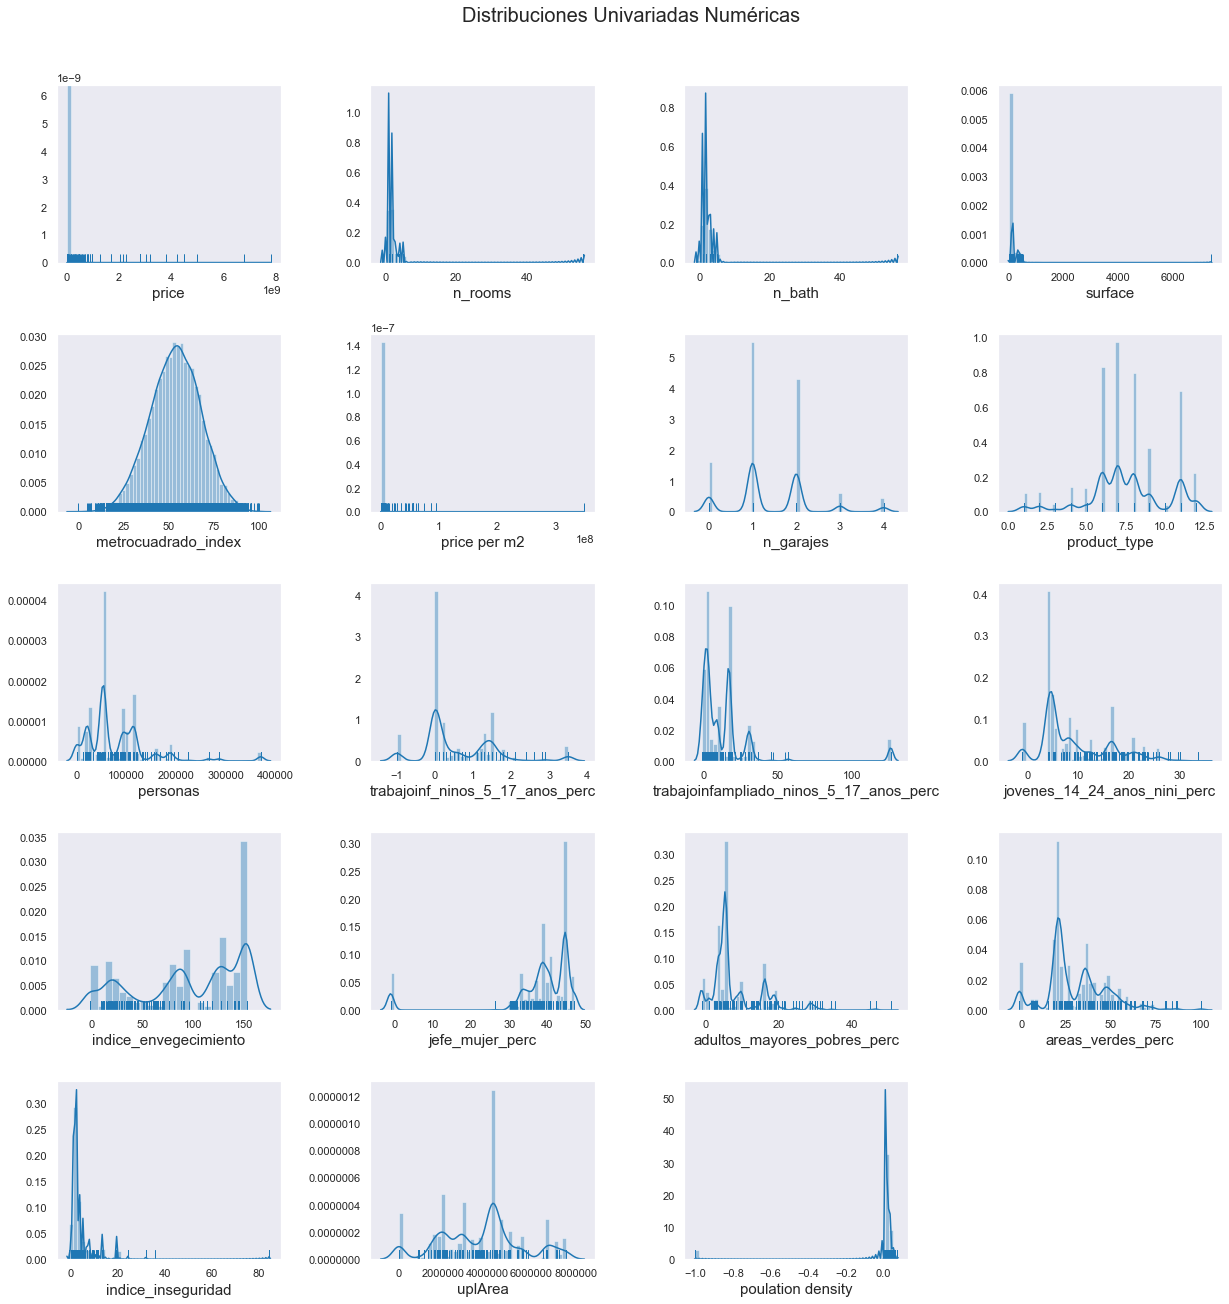

In [21]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=[17, 17])


list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Numéricas',
             fontsize=20,
             x=0.5,
             y=1.05)

for axis, col in zip(ax.flatten(), numeric):
    try :
        # Graficos para datos numericos
        sns.distplot(df[('numeric', col)], ax=axis, rug=True)
               
    except RuntimeError:
        sns.distplot(df[('numeric', col)], ax=axis, rug=True, kde=False)
    
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

In [22]:
#caracter problematico
df[('categorical','zone')][2]='Fontibon'

C:\Users\paula\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[17, 17])


list(map(lambda a : a.remove(), ax[-1,-2:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Distribuciones Univariadas Categoricas',
             fontsize=20,
             x=0.5,
             y=1.05)

for axis, col in zip(ax.flatten(), categorical):

    # Graficos para datos tipos str
    sns.countplot(df[('categorical', col)], ax=axis)
    axis.set_axis_off()
    axis.set_title(col, fontsize=15)
  
    
# Se ajusta el espaciado interno entre subplots
h, w = (.4, .1)
plt.subplots_adjust(wspace=w, hspace=h)

AttributeError: 'NoneType' object has no attribute 'dpi_scale_trans'

C:\Users\paula\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)


Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000262098DF4C8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000262099BA8B8> (for post_execute):


KeyboardInterrupt: 

### 3. Datos faltantes

In [24]:
#se recuperan los valores nan
df.replace(-1,NA, inplace = True) 
df.replace('NaN',NA, inplace = True) 
df.isnull().sum()

numeric      price                                         0
             n_rooms                                      34
             n_bath                                      232
             surface                                       0
             metrocuadrado_index                           0
             price per m2                                277
             n_garajes                                     0
             product_type                                  0
             personas                                   1161
             trabajoinf_ninos_5_17_anos_perc            1161
             trabajoinfampliado_ninos_5_17_anos_perc    1161
             jovenes_14_24_anos_nini_perc               1161
             indice_envegecimiento                      1161
             jefe_mujer_perc                            1161
             adultos_mayores_pobres_perc                1161
             areas_verdes_perc                          1161
             indice_inse

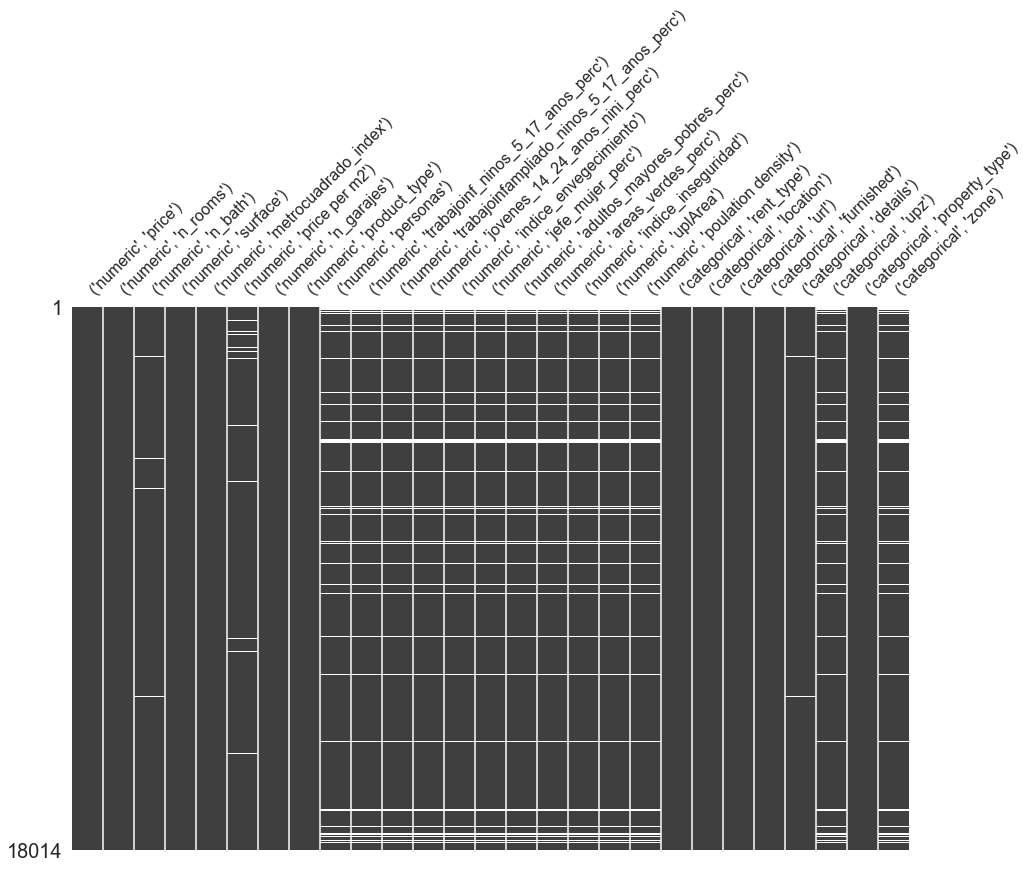

In [25]:
import missingno as msno
fig, ax = plt.subplots(figsize = [15, 10])
msno.matrix(df,ax = ax, sparkline=False)

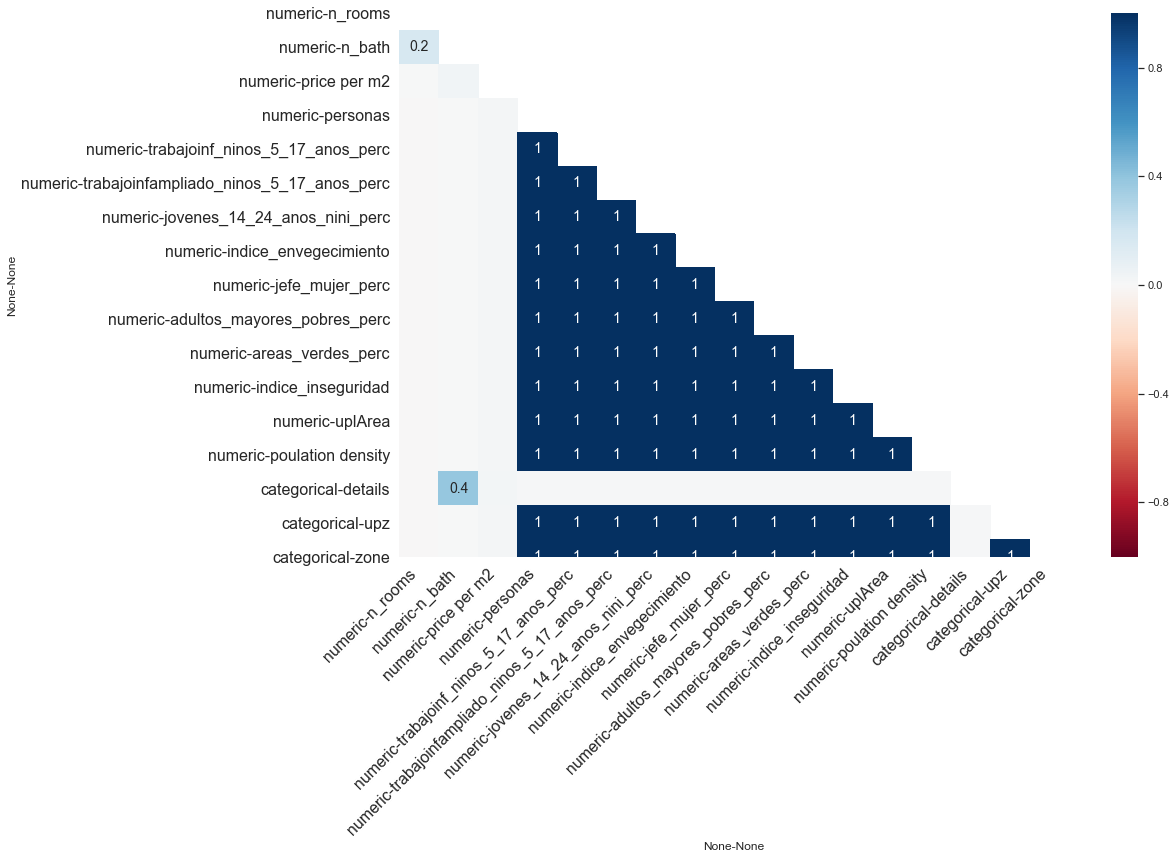

In [26]:
fig, ax = plt.subplots(figsize = [15, 10])
msno.heatmap(df, ax = ax)

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Pipeline categorica
cat_pipe = Pipeline(
    steps=[('imputer_cat', SimpleImputer(strategy='constant', fill_value='missing')), 
           ('onehot',OneHotEncoder(sparse=False, handle_unknown='ignore'))])

#Pipeline numerica
num_pipe = Pipeline(steps=[('scaler', StandardScaler())])

In [28]:
#sin variable dependiente 'price per m2'
num = [
    'price', 'n_rooms', 'n_bath', 'surface',
    'metrocuadrado_index', 'n_garajes', 'product_type',
    'personas', 'trabajoinf_ninos_5_17_anos_perc', 'trabajoinfampliado_ninos_5_17_anos_perc',
    'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento', 'jefe_mujer_perc',
    'adultos_mayores_pobres_perc', 'areas_verdes_perc', 'indice_inseguridad', 'uplArea', 'poulation density'
]

#sin variable url,details,location,zone
cat=[
 'furnished',
 'rent_type',
 'property_type',
 'upz'
]

In [29]:
print(len(num) + len(cat))

22


In [30]:
#Preprocesador Compuesto
prep = ColumnTransformer(
    transformers=[('num', num_pipe, num), 
                  ('cat', cat_pipe, cat)])

In [31]:
# Variables regresoras
X = df.drop(['price per m2','url','details', 'location', 'zone'], axis=1, level=1).copy()
print(X.shape)
# Variable dependiente
y = df[('numeric','price per m2')].copy()
print(y.shape)

(18014, 22)
(18014,)


In [32]:
X.columns = X.columns.droplevel(0)
X_prep = prep.fit_transform(X)

In [33]:
# Se obtienen las variables categoricas transformadas
post_cat = prep.named_transformers_['cat'][-1]
cat_cols_fit = post_cat.get_feature_names(cat)
# cantidad de columnas luego de agregar dummies
post_cols = list(num) +list(cat_cols_fit) 
len(post_cols)

125

In [34]:
df_post = pd.DataFrame(data=X_prep, columns=post_cols)
df_post.shape

(18014, 125)

In [35]:
import sys
#ruta archivo mcar.py
sys.path.append('C:/Users/camil/Tarea-1-Datos')

In [36]:
from mcar import little_mcar
little_mcar(df_post)

#if p>0.05 -> MCAR else MAR/MNAR

{'chi_stat': -5576625709897625.0, 'deg_f': 17889, 'p_value': 1.0}

In [37]:
#se calcula nueva columna dependiente con los datos estandarizados
df_post['price_per_m2'] = df_post['price'] / df_post['surface'] 
df_post.shape

(18014, 126)

In [38]:
#se eliminan columnas price y surface
df_post=df_post.drop(columns=['price', 'surface'])
df_post.head()

,n_rooms,n_bath,metrocuadrado_index,n_garajes,product_type,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,...,upz_UPZ92,upz_UPZ93,upz_UPZ94,upz_UPZ95,upz_UPZ96,upz_UPZ97,upz_UPZ98,upz_UPZ99,upz_missing,price_per_m2
0,0.644773,-0.199527,-2.015582,-0.466140,0.56778,-1.022352,-0.113018,0.110317,-0.397838,0.922808,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235487
1,0.644773,-0.199527,0.260132,-0.466140,-2.64163,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.365046
2,0.644773,-0.844028,-2.977555,-1.571598,-2.64163,1.482456,-0.340241,-0.605272,0.748597,-1.219174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-8.708959
3,1.913851,1.089477,0.166806,-1.571598,0.56778,1.117442,0.455039,-0.621913,0.450210,-0.670331,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237445
4,1.279312,0.444975,-0.472117,-0.466140,-2.64163,-0.544366,1.250318,0.039590,-0.099451,-1.020565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.858434


In [39]:
# se eliminan filas con NaN dado que los datos siguen hipotesis de MCAR
df_post=df_post.dropna()
df_post.shape

(16618, 124)

### 4. UPZ clustering

In [40]:
cols_upz = [ 'personas', 'trabajoinf_ninos_5_17_anos_perc', 'trabajoinfampliado_ninos_5_17_anos_perc',
            'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento', 'jefe_mujer_perc', 'adultos_mayores_pobres_perc',
            'areas_verdes_perc',  'uplArea', 'poulation density',
            'n_rooms', 'n_bath', 'metrocuadrado_index', 'n_garajes', 'product_type','indice_inseguridad']

df_num=df_post[cols_upz].copy()
df_num

,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,areas_verdes_perc,uplArea,poulation density,n_rooms,n_bath,metrocuadrado_index,n_garajes,product_type,indice_inseguridad
0,-1.022352,-0.113018,0.110317,-0.397838,0.922808,1.000915,-0.493461,-1.683649,-0.984687,-1.056639,0.644773,-0.199527,-2.015582,-0.466140,0.567780,-0.020082
2,1.482456,-0.340241,-0.605272,0.748597,-1.219174,-2.179139,0.865904,-0.683498,0.617905,1.217619,0.644773,-0.844028,-2.977555,-1.571598,-2.641630,-0.698614
3,1.117442,0.455039,-0.621913,0.450210,-0.670331,-0.804041,-0.053113,0.376090,-0.139230,1.680679,1.913851,1.089477,0.166806,-1.571598,0.567780,-0.551681
4,-0.544366,1.250318,0.039590,-0.099451,-1.020565,-0.987165,-0.473832,0.016885,-0.646892,-0.327395,1.279312,0.444975,-0.472117,-0.466140,-2.641630,-0.114712
5,1.158308,-0.340241,-0.580309,1.172621,-1.659102,-1.317527,0.699903,0.852985,1.579396,0.253286,0.644773,-0.199527,-1.527416,-1.571598,0.567780,-0.102530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18009,-0.498828,-0.794686,0.052072,-0.853271,1.087248,0.948213,-0.476442,-0.739774,0.163045,-0.708230,0.010234,0.444975,0.138090,0.639317,1.771309,-0.343402
18010,-0.498828,-0.794686,0.052072,-0.853271,1.087248,0.948213,-0.476442,-0.739774,0.163045,-0.708230,0.010234,-0.199527,-1.979687,-0.466140,1.771309,-0.343402
18011,-0.498828,-0.794686,0.052072,-0.853271,1.087248,0.948213,-0.476442,-0.739774,0.163045,-0.708230,0.010234,0.444975,-0.206497,0.639317,0.166604,-0.343402
18012,0.472788,0.909484,-0.571988,-0.711929,0.529862,-0.487808,-0.696486,-0.439265,0.385840,0.314040,0.010234,0.444975,-0.665947,0.639317,0.166604,-0.524702


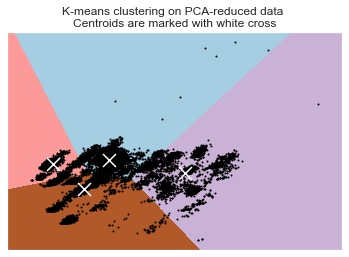

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(df_num)
kmeans = KMeans(n_clusters=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')


plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on PCA-reduced data \n'
          'Centroids are marked with white cross')

plt.xticks(())
plt.yticks(())
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [42]:
labels=kmeans.labels_
labels=list(labels)
len(labels)

16618

In [43]:
def get_clus_series(cluster_label , labels):
    clus_serie = len(labels) * [0]
    for i in range(len(labels)):
        if labels[i] == cluster_label:
            clus_serie[i]=1
        else:
            continue
    return clus_serie

In [44]:
upz_cluster_1 = get_clus_series(0,labels)
upz_cluster_2 = get_clus_series(1,labels)
upz_cluster_3 = get_clus_series(2,labels)
upz_cluster_4 = get_clus_series(3,labels)

In [45]:
upz = pd.DataFrame(list(zip(upz_cluster_1, upz_cluster_2, upz_cluster_3, upz_cluster_4)),
                   columns=['upz_cluster_1', 'upz_cluster_2', 'upz_cluster_3', 'upz_cluster_4'])
upz

,upz_cluster_1,upz_cluster_2,upz_cluster_3,upz_cluster_4
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
16613,0,1,0,0
16614,0,1,0,0
16615,0,1,0,0
16616,1,0,0,0


In [46]:
upz.isnull().sum()

upz_cluster_1    0
upz_cluster_2    0
upz_cluster_3    0
upz_cluster_4    0
dtype: int64

In [47]:
df_upz_cols = [col for col in df_post.columns if 'upz' in col]
df_post=df_post.drop(columns=df_upz_cols)
df_post.reset_index(inplace=True)
df_post=df_post.drop(columns='index')
df_post=df_post.join(upz)

In [48]:
df_post

,n_rooms,n_bath,metrocuadrado_index,n_garajes,product_type,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,...,furnished_1,rent_type_Arriendo,rent_type_Venta,property_type_Apartamento,property_type_Casa,price_per_m2,upz_cluster_1,upz_cluster_2,upz_cluster_3,upz_cluster_4
0,0.644773,-0.199527,-2.015582,-0.466140,0.567780,-1.022352,-0.113018,0.110317,-0.397838,0.922808,...,0.0,1.0,0.0,0.0,1.0,0.235487,0,1,0,0
1,0.644773,-0.844028,-2.977555,-1.571598,-2.641630,1.482456,-0.340241,-0.605272,0.748597,-1.219174,...,0.0,1.0,0.0,0.0,1.0,-8.708959,0,0,1,0
2,1.913851,1.089477,0.166806,-1.571598,0.567780,1.117442,0.455039,-0.621913,0.450210,-0.670331,...,0.0,1.0,0.0,0.0,1.0,0.237445,0,0,1,0
3,1.279312,0.444975,-0.472117,-0.466140,-2.641630,-0.544366,1.250318,0.039590,-0.099451,-1.020565,...,0.0,1.0,0.0,0.0,1.0,-0.858434,1,0,0,0
4,0.644773,-0.199527,-1.527416,-1.571598,0.567780,1.158308,-0.340241,-0.580309,1.172621,-1.659102,...,0.0,1.0,0.0,0.0,1.0,0.303277,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,0.010234,0.444975,0.138090,0.639317,1.771309,-0.498828,-0.794686,0.052072,-0.853271,1.087248,...,1.0,1.0,0.0,1.0,0.0,-0.055599,0,1,0,0
16614,0.010234,-0.199527,-1.979687,-0.466140,1.771309,-0.498828,-0.794686,0.052072,-0.853271,1.087248,...,1.0,1.0,0.0,1.0,0.0,-0.065092,0,1,0,0
16615,0.010234,0.444975,-0.206497,0.639317,0.166604,-0.498828,-0.794686,0.052072,-0.853271,1.087248,...,1.0,0.0,1.0,1.0,0.0,-0.201527,0,1,0,0
16616,0.010234,0.444975,-0.665947,0.639317,0.166604,0.472788,0.909484,-0.571988,-0.711929,0.529862,...,1.0,1.0,0.0,1.0,0.0,-0.300202,1,0,0,0


In [49]:
price=df_post['price_per_m2'].copy()

In [50]:
price_clus_1= price* df_post['upz_cluster_1']
price_clus_2= price* df_post['upz_cluster_2']
price_clus_3= price* df_post['upz_cluster_3']
price_clus_4= price* df_post['upz_cluster_4']

In [51]:
price_1=price_clus_1[price_clus_1 != 0]
price_2=price_clus_2[price_clus_2 != 0]
price_3=price_clus_3[price_clus_3 != 0]
price_4=price_clus_4[price_clus_4 != 0]

In [52]:
from scipy.stats import f_oneway
#hipotesis nula: No hay diferencia significativa entre los grupos->si p<0.05 se rechaza hipotesis nula
F,p = f_oneway(price_1, price_2, price_3, price_4)

print('Estadistico F:',F)
print('p valor :', p)

Estadistico F: 1.1233410950467737
p valor : 0.3380476536773523


### 5. Relaciones entre variables

In [53]:
interest = [
    'metrocuadrado_index', 'trabajoinf_ninos_5_17_anos_perc', 'trabajoinfampliado_ninos_5_17_anos_perc',
    'jovenes_14_24_anos_nini_perc', 'product_type', 'jefe_mujer_perc',
    'personas', 'uplArea', 'poulation density' , 'price_per_m2'      
]

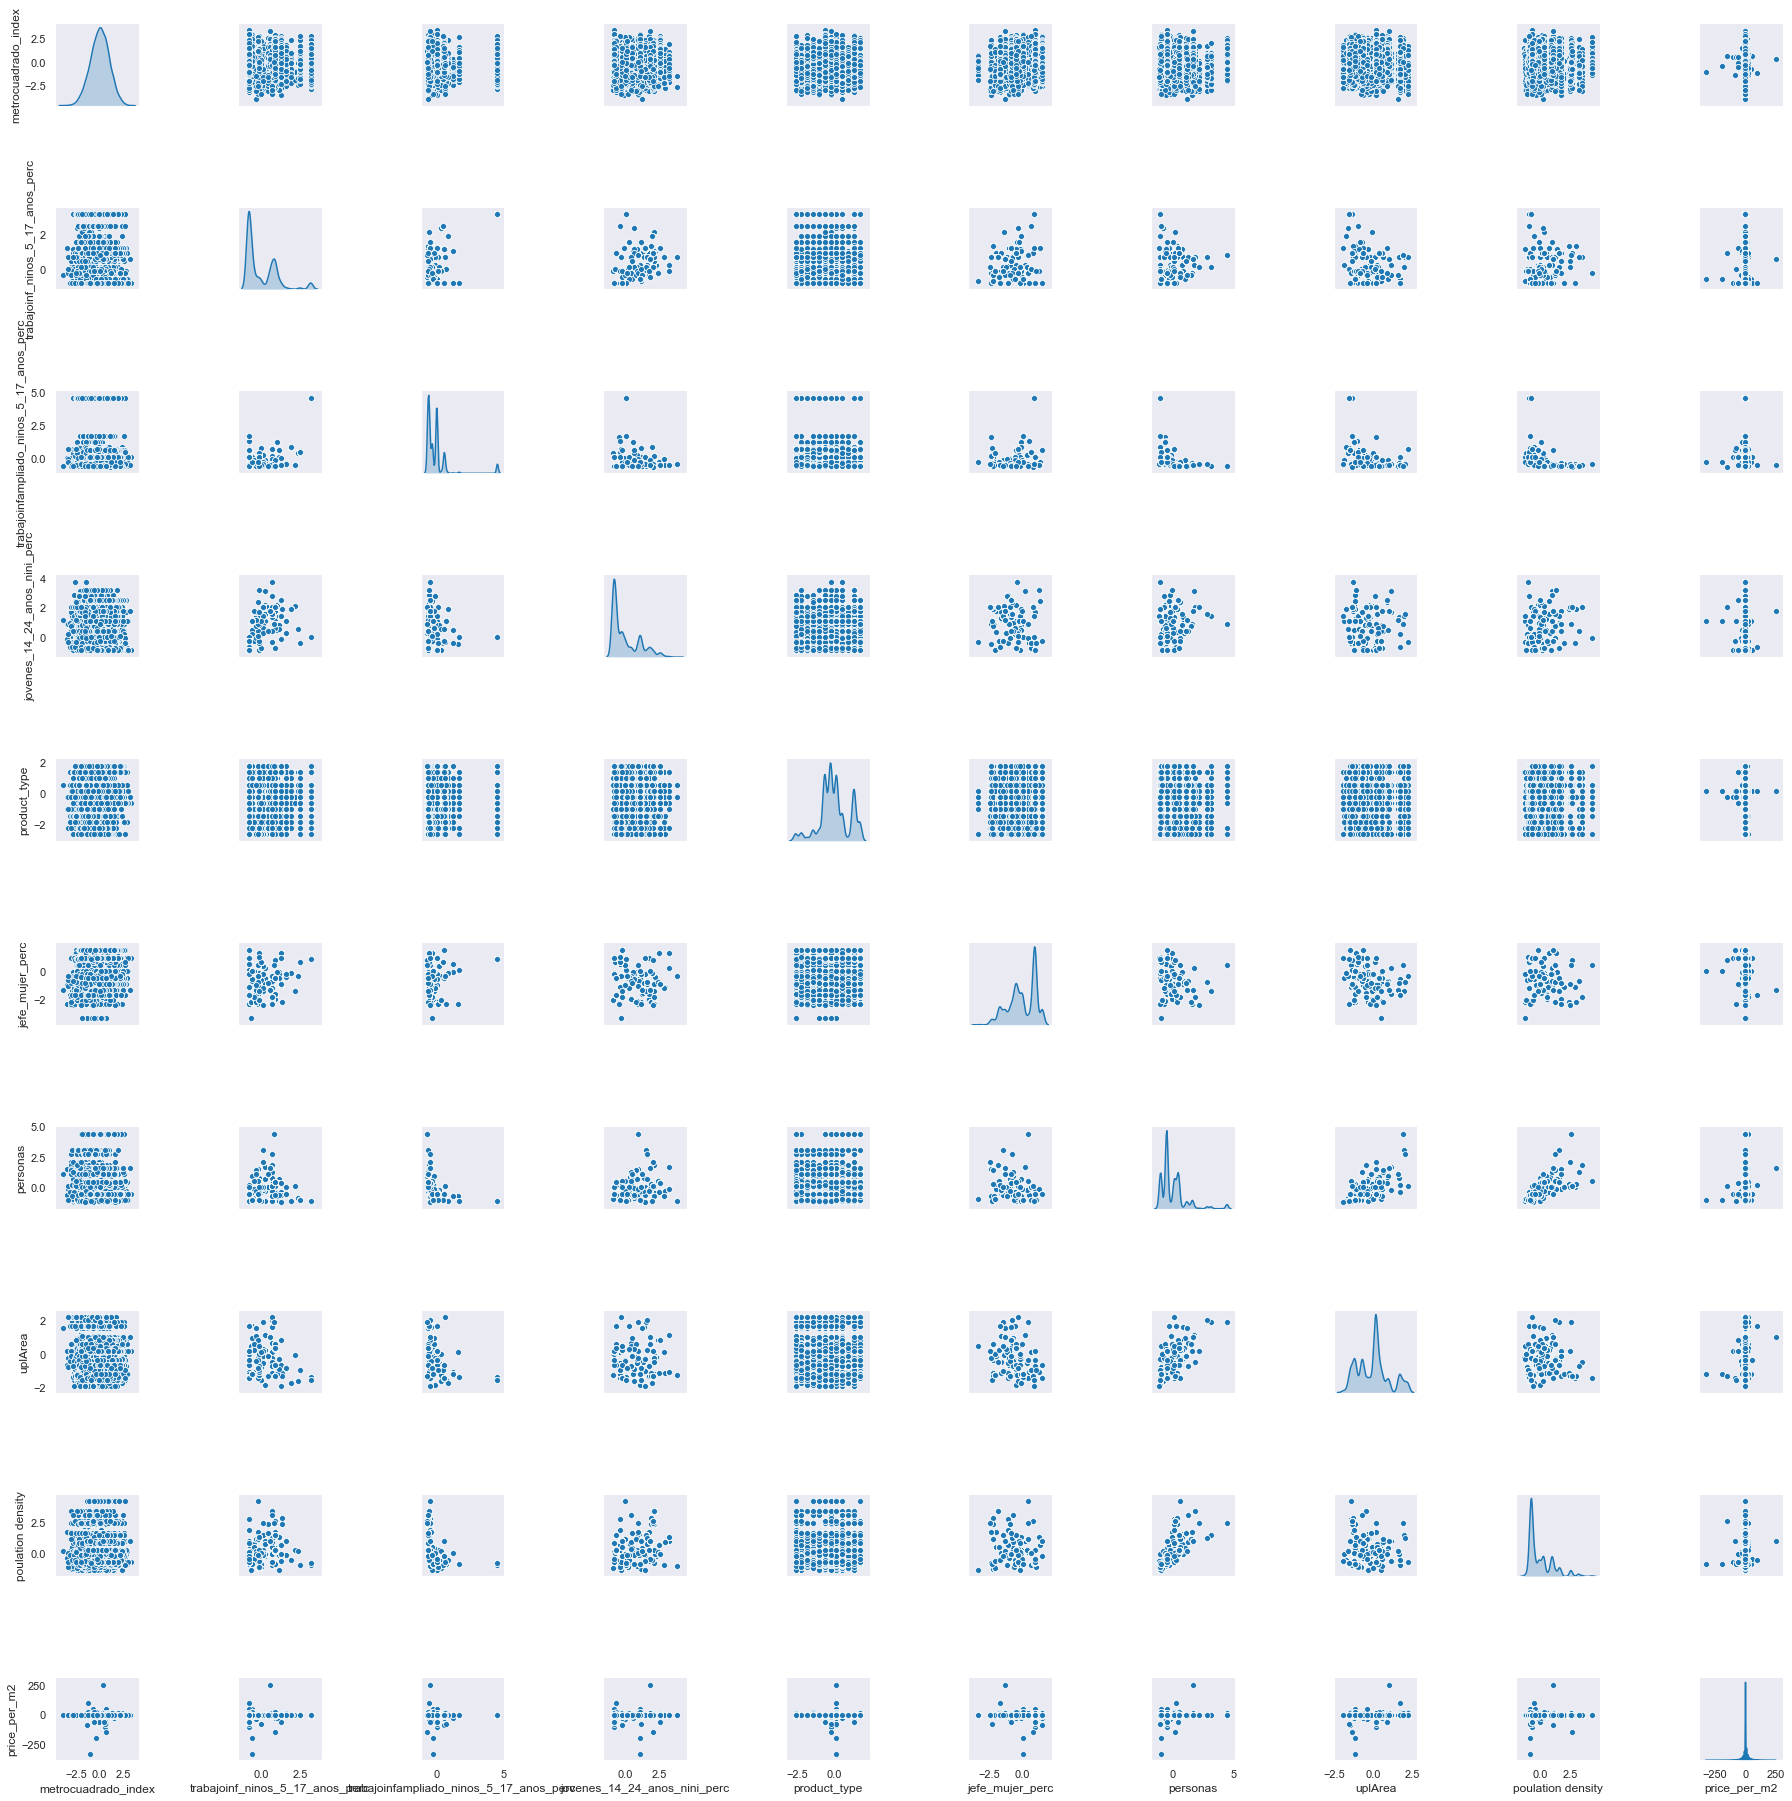

In [54]:
sns.pairplot(data = df_post[interest], diag_kind='kde')

In [55]:
corrmat = df_post.corr()
col = ['price_per_m2']
corrmat[col].nlargest(5,col)

,price_per_m2
price_per_m2,1.000000
uplArea,0.018734
personas,0.017920
upz_cluster_1,0.010680
metrocuadrado_index,0.010041


In [56]:
corrmat[col].nsmallest(5,col)

,price_per_m2
jefe_mujer_perc,-0.013538
n_bath,-0.010654
upz_cluster_2,-0.009780
furnished_1,-0.007390
upz_cluster_4,-0.006456


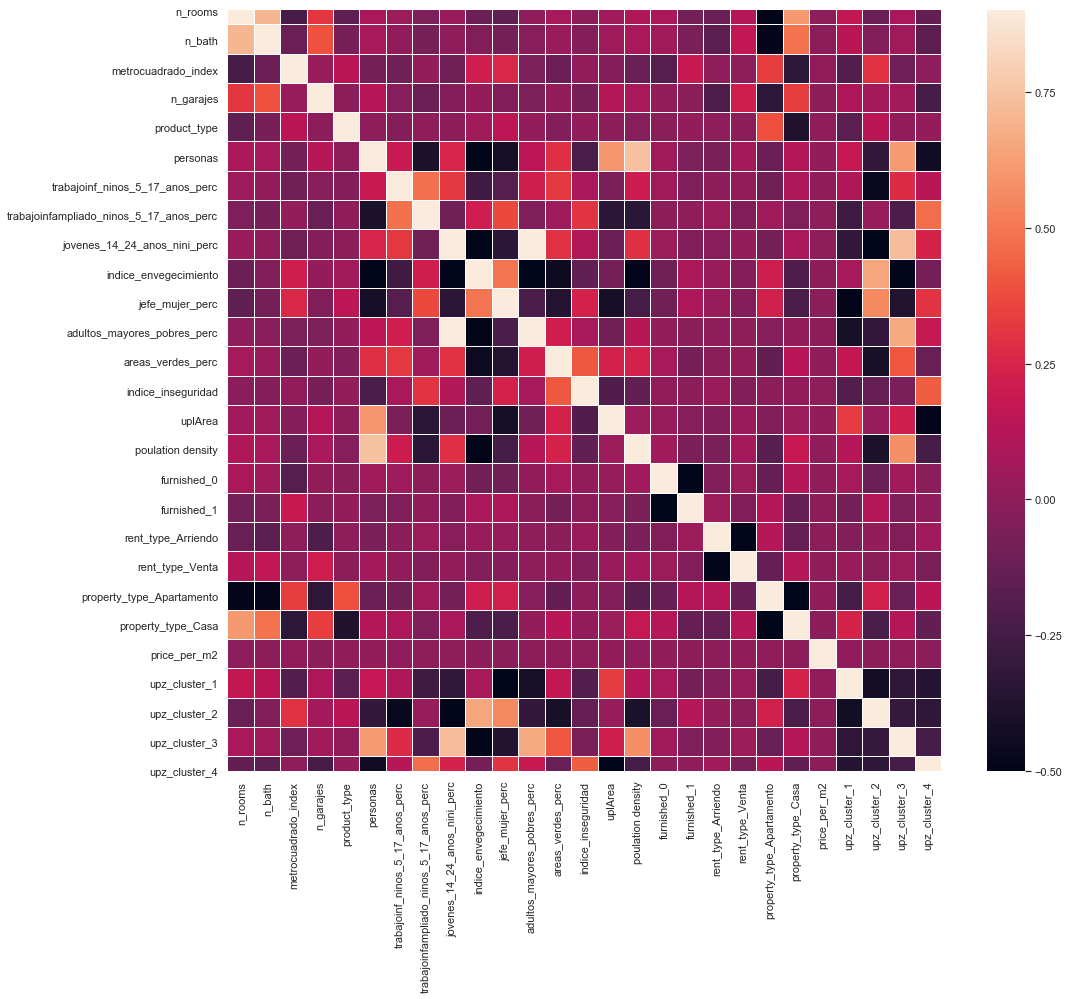

In [57]:
fig, ax = plt.subplots(figsize=[16, 14])

sns.heatmap(corrmat, vmin=-.5, vmax=.9, linewidths=.01)

In [58]:
#variables categoricas
def compare_cat(cat1, cat2):
    to_compare =[cat1, cat2]
    data_cat = df['categorical']
    kwargs = {'index': data_cat[to_compare[0]], 'columns': data_cat[to_compare[1]]}
    tabla = pd.crosstab(**kwargs, margins=False)
    return tabla

#from scipy.stats import chi2_contingency
#chi2, p, dof, ex =chi2_contingency(tabla)


### 6. Observaciones anomalas

In [59]:
df_post

,n_rooms,n_bath,metrocuadrado_index,n_garajes,product_type,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,...,furnished_1,rent_type_Arriendo,rent_type_Venta,property_type_Apartamento,property_type_Casa,price_per_m2,upz_cluster_1,upz_cluster_2,upz_cluster_3,upz_cluster_4
0,0.644773,-0.199527,-2.015582,-0.466140,0.567780,-1.022352,-0.113018,0.110317,-0.397838,0.922808,...,0.0,1.0,0.0,0.0,1.0,0.235487,0,1,0,0
1,0.644773,-0.844028,-2.977555,-1.571598,-2.641630,1.482456,-0.340241,-0.605272,0.748597,-1.219174,...,0.0,1.0,0.0,0.0,1.0,-8.708959,0,0,1,0
2,1.913851,1.089477,0.166806,-1.571598,0.567780,1.117442,0.455039,-0.621913,0.450210,-0.670331,...,0.0,1.0,0.0,0.0,1.0,0.237445,0,0,1,0
3,1.279312,0.444975,-0.472117,-0.466140,-2.641630,-0.544366,1.250318,0.039590,-0.099451,-1.020565,...,0.0,1.0,0.0,0.0,1.0,-0.858434,1,0,0,0
4,0.644773,-0.199527,-1.527416,-1.571598,0.567780,1.158308,-0.340241,-0.580309,1.172621,-1.659102,...,0.0,1.0,0.0,0.0,1.0,0.303277,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,0.010234,0.444975,0.138090,0.639317,1.771309,-0.498828,-0.794686,0.052072,-0.853271,1.087248,...,1.0,1.0,0.0,1.0,0.0,-0.055599,0,1,0,0
16614,0.010234,-0.199527,-1.979687,-0.466140,1.771309,-0.498828,-0.794686,0.052072,-0.853271,1.087248,...,1.0,1.0,0.0,1.0,0.0,-0.065092,0,1,0,0
16615,0.010234,0.444975,-0.206497,0.639317,0.166604,-0.498828,-0.794686,0.052072,-0.853271,1.087248,...,1.0,0.0,1.0,1.0,0.0,-0.201527,0,1,0,0
16616,0.010234,0.444975,-0.665947,0.639317,0.166604,0.472788,0.909484,-0.571988,-0.711929,0.529862,...,1.0,1.0,0.0,1.0,0.0,-0.300202,1,0,0,0


In [60]:
df_numeric = [ 'n_rooms', 'n_bath', 'metrocuadrado_index',  'n_garajes', 'personas',
                    'trabajoinf_ninos_5_17_anos_perc', 'trabajoinfampliado_ninos_5_17_anos_perc',
                    'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento' , 'jefe_mujer_perc',
                    'adultos_mayores_pobres_perc', 'areas_verdes_perc', 'indice_inseguridad',
                    'uplArea', 'poulation density'  ]

In [61]:
from sklearn.cluster import DBSCAN

data_= df_post[df_numeric].copy()
#data_ = PCA(n_components=2).fit_transform(data_)

#reduced_ = PCA(n_components=2).fit_transform(data_)
db = DBSCAN(eps=0.3, min_samples=10).fit(data_)

In [62]:
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Cantidad de clusters: %d' % n_clusters_)
print('Cantidad de outliers: %d' % n_noise_)

Cantidad de clusters: 127
Cantidad de outliers: 6953


In [63]:
outliers=pd.DataFrame(data_)
outliers=outliers[labels==-1]

In [64]:
outliers

,n_rooms,n_bath,metrocuadrado_index,n_garajes,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,areas_verdes_perc,indice_inseguridad,uplArea,poulation density
0,0.644773,-0.199527,-2.015582,-0.466140,-1.022352,-0.113018,0.110317,-0.397838,0.922808,1.000915,-0.493461,-1.683649,-0.020082,-0.984687,-1.056639
1,0.644773,-0.844028,-2.977555,-1.571598,1.482456,-0.340241,-0.605272,0.748597,-1.219174,-2.179139,0.865904,-0.683498,-0.698614,0.617905,1.217619
2,1.913851,1.089477,0.166806,-1.571598,1.117442,0.455039,-0.621913,0.450210,-0.670331,-0.804041,-0.053113,0.376090,-0.551681,-0.139230,1.680679
3,1.279312,0.444975,-0.472117,-0.466140,-0.544366,1.250318,0.039590,-0.099451,-1.020565,-0.987165,-0.473832,0.016885,-0.114712,-0.646892,-0.327395
4,0.644773,-0.199527,-1.527416,-1.571598,1.158308,-0.340241,-0.580309,1.172621,-1.659102,-1.317527,0.699903,0.852985,-0.102530,1.579396,0.253286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16587,-0.624304,-0.844028,1.624124,0.639317,0.472788,0.909484,-0.571988,-0.711929,0.529862,-0.487808,-0.696486,-0.439265,-0.524702,0.385840,0.314040
16597,0.010234,-0.199527,-1.520237,0.639317,1.117442,0.455039,-0.621913,0.450210,-0.670331,-0.804041,-0.053113,0.376090,-0.551681,-0.139230,1.680679
16605,0.010234,0.444975,-0.005488,0.639317,0.087036,-0.113018,-0.634394,-0.225087,-1.394291,-1.398605,-0.439493,2.312567,0.311225,0.482981,-0.177262
16612,0.010234,0.444975,0.044764,1.744774,4.461906,0.795873,-0.642715,0.921347,-1.665509,0.439405,0.190681,0.506211,-0.581433,1.930868,2.516036


In [65]:
num=len(outliers)*100/(len(data_)*15)
print('Porcentaje de outliers:' + f"{num:.2f}" )

Porcentaje de outliers:2.79


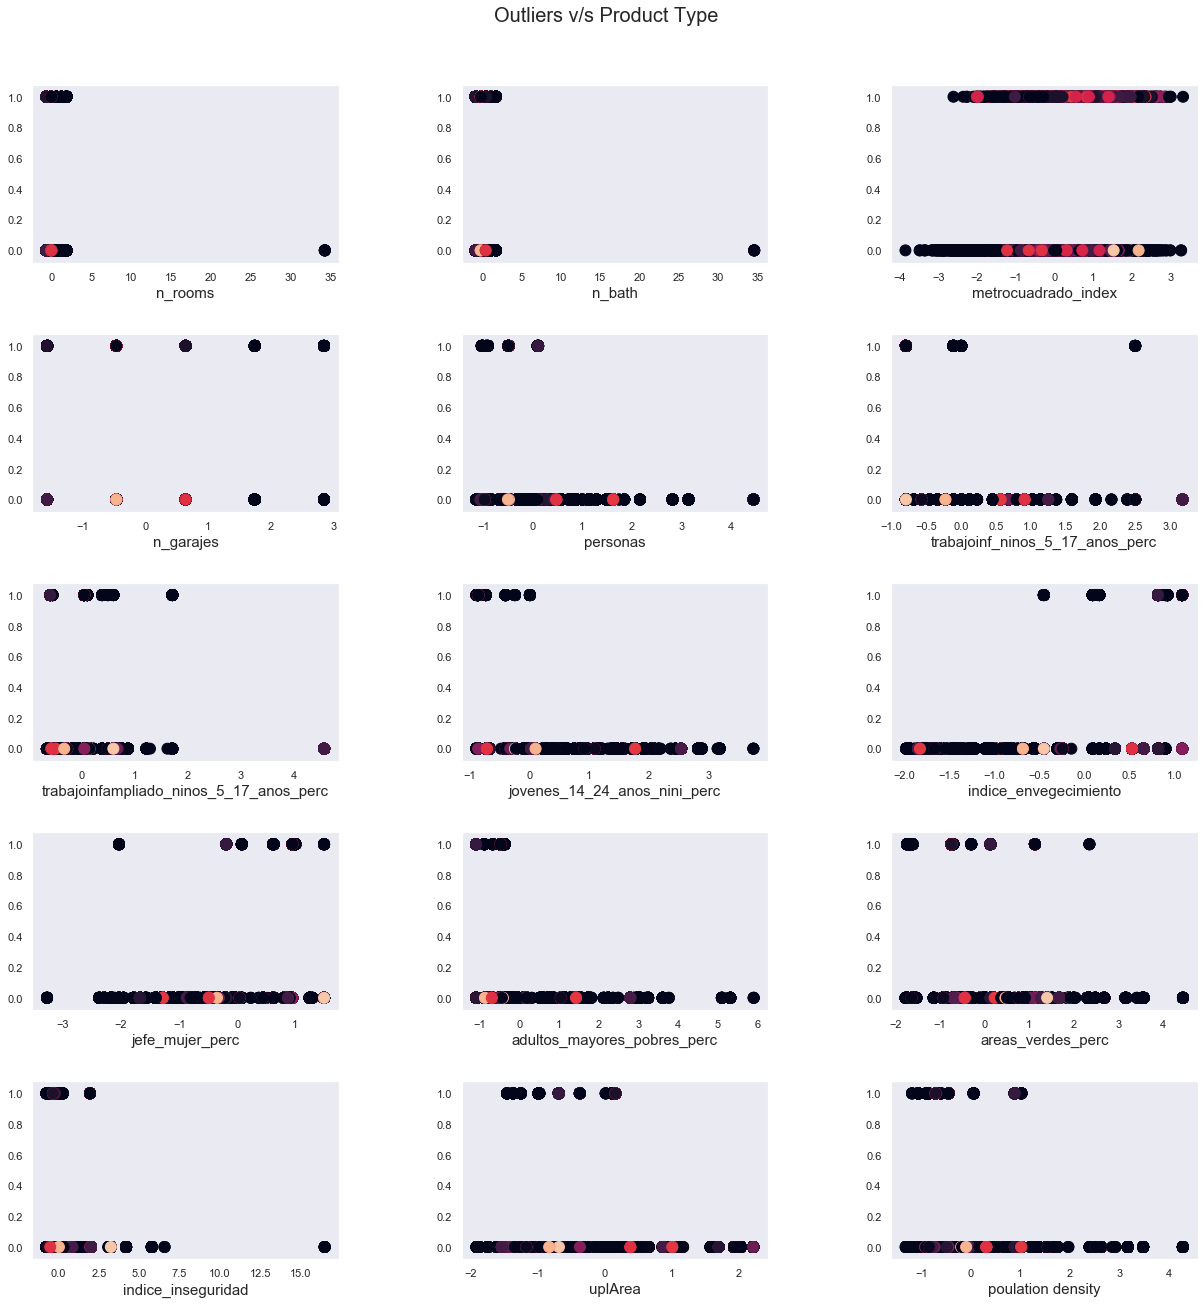

In [66]:
# Grilla de subplots
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=[17, 17])


#list(map(lambda a : a.remove(), ax[-1,-1:]))

# Se ajusta el espaciado exterior de la figura
fig.tight_layout()

# Se define un titulo y su ubicacion
fig.suptitle('Outliers v/s Product Type',
             fontsize=20,
             x=0.5,
             y=1.05)

for axis, col in zip(ax.flatten(), df_numeric):
    axis.scatter(data_[col], df_post['upz_cluster_2'], c=labels, s=120)
    axis.set_xlabel(col, fontsize=15)

# Se ajusta el espaciado interno entre subplots
w, h = (.4, .4)
plt.subplots_adjust(wspace=w, hspace=h)

In [67]:
data_= df_post[df_numeric].copy()
Q1 = data_.quantile(0.25)
Q3 = data_.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

n_rooms                                    0.634539
n_bath                                     0.644502
metrocuadrado_index                        1.349634
n_garajes                                  1.105457
personas                                   0.971615
trabajoinf_ninos_5_17_anos_perc            1.476947
trabajoinfampliado_ninos_5_17_anos_perc    0.607418
jovenes_14_24_anos_nini_perc               1.774618
indice_envegecimiento                      1.753308
jefe_mujer_perc                            1.534681
adultos_mayores_pobres_perc                0.714057
areas_verdes_perc                          1.276302
indice_inseguridad                         0.367262
uplArea                                    1.115304
poulation density                          1.059391
dtype: float64


In [68]:
anomalos= (data_ < (Q1 - 1.5 * IQR)) | (data_ > (Q3 + 1.5 * IQR))
print(anomalos)

       n_rooms  n_bath  metrocuadrado_index  n_garajes  personas  \
0        False   False                False      False     False   
1        False   False                 True      False     False   
2         True   False                False      False     False   
3         True   False                False      False     False   
4        False   False                False      False     False   
...        ...     ...                  ...        ...       ...   
16613    False   False                False      False     False   
16614    False   False                False      False     False   
16615    False   False                False      False     False   
16616    False   False                False      False     False   
16617    False   False                False      False     False   

       trabajoinf_ninos_5_17_anos_perc  \
0                                False   
1                                False   
2                                False   
3              

In [69]:
an_=anomalos.where(anomalos==True)
an_

,n_rooms,n_bath,metrocuadrado_index,n_garajes,personas,trabajoinf_ninos_5_17_anos_perc,trabajoinfampliado_ninos_5_17_anos_perc,jovenes_14_24_anos_nini_perc,indice_envegecimiento,jefe_mujer_perc,adultos_mayores_pobres_perc,areas_verdes_perc,indice_inseguridad,uplArea,poulation density
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
an_.sum().sum()

11422.0

In [71]:
num=(an_.sum().sum()*100) / (len(data_)*15)
print('Porcentaje de outliers:' + f"{num:.2f}" )

Porcentaje de outliers:4.58


# P3 Regresión Lineal Bayesiana

### Desarrollo teórico:

Dado un conjunto de observaciones $D= \{(x_i,y_i)\}_{i=1}^N$ $\in \mathbb{R}^{d-1}\times \mathbb{R}$, el modelo de regresión lineal, concibe el problema de regresión mediante el esquema:

$$ y_i = w_0 + \sum_{j=1}^{d-1}w_jx_{i,j} + \varepsilon_j = \textbf{w}^T\textbf{x}_i + \varepsilon_j \tag{1}$$

con la convención $x_{i,0} = 1$ $\forall i\,\in\{1,\cdots,N\}$ y con $\varepsilon_j \sim \mathcal{N}(0,\beta^{-1})$ i.i.d. $\forall i\,\in\{1,\cdots,N\}$. Dada la suposición de normalidad del error, es decir $\varepsilon_j \sim \mathcal{N}(0,\beta^{-1})$, la verosimilitud para una observación es expresada según

$$ p(y_i|\textbf{x}_i,\textbf{w},\beta)\sim \mathcal{N}(\textbf{w}^T\textbf{x}_i,\beta^{-1}). \tag{*}$$

Para este problema, la familia de funciones aproximadoras $\mathcal{M}$, denominada como $modelo$, corresponde a las funciones lineales representadas por $\textbf{w}$. Así, si se escribe la verosimilitud anterior como $p(\mathcal{D}|\mathcal{M})$, según el Teorema de Bayes, se tiene

$$ p(\mathcal{M}|\mathcal{D}) = \frac{p(\mathcal{D}|\mathcal{M})p(\mathcal{M})}{p(\mathcal{D})} \tag{2}$$

Es decir, la probabilidad posterior $p(\mathcal{M}|\mathcal{D})$ de elegir una función aproximadora, dado el cunjunto de datos, puede ser calculada en función de una probabilidad a priori, sobre el modelo $p(\mathcal{M})$, la verosimilitud $p(\mathcal{D}|\mathcal{M})$ y la evidencia $p(\mathcal{D})$. El enfoque bayesiano consiste en modelar una probabilidad a priori $p(\mathcal{M})$ para obtener la función que mejor modele los datos utilizando la expresión (2) para trabajar con $p(\mathcal{M}|\mathcal{D})$. Observe que en el caso del modelo lineal (1), obtener una expresión para $p(\mathcal{M})$, es equivalente a modelar una distribución sobre $\textbf{w}$.

1. Utilice una distribución gaussiana isotrópica sobre los parámetros $\textbf{w}$ con media cero:

$$p(\textbf{w}|\alpha) \sim \mathcal{N}(0,\alpha^{-1}\textbf{I})$$

considere que $p(\mathcal{D})$ es una constante. Con esto, muestre que la distribución posterior de los parámetros $\textbf{w}$ es proporcional a 

$$ p(\textbf{w}|\textbf{y},\textbf{X},\alpha,\beta) \sim \mathcal{N}(m_N,\textbf{S}_N)$$

donde

$$m_N = \beta\, \textbf{S}_N\textbf{X}^T\textbf{y}$$

$$\textbf{S}_N^{-1} = \alpha\,\textbf{I} + \beta\, \textbf{X}^T\textbf{X}$$

$\textbf{Solución 1}$: Primero notemos lo siguiente. Dada la densidad $\textit{a priori}$ de $y_i$, definamos como $\textbf{y} = (y_1,\cdots,y_N)^T$. Por lo tanto, por lo definido en $(*)$, sabemos que

$$p(\textbf{y}|X,\textbf{w},\beta) \sim \mathcal{N}(X\textbf{w},\beta^{-1}\textbf{I}),$$

donde $X$ es la matriz de observaciones, donde cada fila $i$ corresponde a un vector $\textbf{x}_i$. Además notamos que, como todo valores $y_i$ contiene su factor aleatorio en su error $\varepsilon_i$ (y estos son i.i.d), cada observación es independiente a la otra, es decir, las covarianzas entre $y$'s son cero y la matriz de varianza-covarianzas es $\beta^{-1}I$. Esta matriz es diagonal, definida positiva  pues $\beta >0$, con determinante $\beta^{-N}$ e inversa $\beta\, I$. Así, tenemos que: 

$$p(\mathcal{D}|\mathcal{M}) = p(\textbf{y}|X,\textbf{w},\beta) = \left(\frac{\beta}{2\pi}\right)^{N/2}exp\left(-\frac{\beta}{2}(y-X\textbf{w})^T(y-X\textbf{w})\right).$$

De la misma forma, viendo ahora a $\textbf{w}$ como observación, y conociendo su distribución gaussiana, sabemos que

$$p(\mathcal{M}) = p(\textbf{w}|\alpha) = \left(\frac{\alpha}{2\pi}\right)^{N/2}exp\left(-\frac{\alpha}{2}\textbf{w}^T\textbf{w}\right).$$

Por lo tanto, 

$$p(\mathcal{D}|\mathcal{M})p(\mathcal{M}) = \left(\frac{\alpha\beta}{4\pi^2}\right)^{N/2}exp\left(-\frac{1}{2}\left[\beta\,(y-X\textbf{w})^T(y-X\textbf{w}) + \alpha\, \textbf{w}^T\textbf{w}\right]\right). \tag{**}$$

Así, lo que está al interior de la función exponencial puede ser escrito como (ignoraremos el factor común de -1/2):

$$\beta\,y^Ty -\beta\,(X\textbf{w})^Ty - \beta\,y^T(X\textbf{w}) + \beta\,(X\textbf{w})^T(X\textbf{w}) + \alpha\,\textbf{w}^T\textbf{w}$$

$$=\,\beta\,y^Ty -\beta\,\textbf{w}^TX^Ty - \beta\,y^TX\textbf{w} + \beta\,\textbf{w}^TX^TX\textbf{w} + \alpha\,\textbf{w}^T\textbf{w}.$$

Si juntamos los dos últimos sumandos de la expresión anterior, notamos que ambos posee en factor $\textbf{w}^T$ al lado izquierdo y $\textbf{w}$ al derecho, factorizando queda

$$\,\beta\,y^Ty -\beta\,\textbf{w}^TX^Ty - \beta\,y^TX\textbf{w} + \textbf{w}^T\left(\alpha\,I + \beta\,X^TX\right)\textbf{w},\tag{***}$$

donde la matriz $\left(\alpha\,I + \beta\,X^TX\right)$ que aparece posee las siguientes cualidades: como $X^TX$ es una matriz simétrica, entonces $\left(\alpha\,I + \beta\,X^TX\right)$ también lo será, si la muestra de los datos que conforman la matriz $X$ cumple lo necesario, entonces $\left(\alpha\,I + \beta\,X^TX\right)$ será invertible. A la inversa de esta matriz la llamaremos $S_N$. Por lo anterior, sabemos que $S_N$ también es simétrica, por lo tanto

$$I = S_N\left(\alpha\,I + \beta\,X^TX\right) = \left(\alpha\,I + \beta\,X^TX\right)S_N = S_N^T\left(\alpha\,I + \beta\,X^TX\right) = \left(\alpha\,I + \beta\,X^TX\right)S_N^T.$$

Tomemos el segundo sumando de la expresión en $(***)$ y veamos que:

$$-\beta\,\textbf{w}^TX^Ty = -\beta\,\textbf{w}^T\left(\alpha\,I + \beta\,X^TX\right)S_NX^Ty,$$

ahora hagamos algo parecido, pero con el tercer sumando:

$$-\beta\,y^TX\textbf{w} = -\beta\,y^TXS_N^T\left(\alpha\,I + \beta\,X^TX\right)\textbf{w} = -\beta\,(S_NX^Ty)^T\left(\alpha\,I + \beta\,X^TX\right)\textbf{w}$$.

De este modo, reemplazando en la expresión $(***)$:

$$\beta\,y^Ty -\beta\,\textbf{w}^T\left(\alpha\,I + \beta\,X^TX\right)S_NX^Ty -\beta\,(S_NX^Ty)^T\left(\alpha\,I + \beta\,X^TX\right)\textbf{w} + \textbf{w}^T\left(\alpha\,I + \beta\,X^TX\right)\textbf{w},$$

podemos sumar y restar el término $\beta^2\,(S_NX^Ty)^T(S_NX^Ty)$ para obtener:

$$\beta\,y^Ty - \beta^2\,(S_NX^Ty)^T(S_NX^Ty) + \left(\textbf{w}-\beta\,S_NX^Ty\right)^T(\alpha\,I+\beta\,X^TX)\left(\textbf{w}-\beta\,S_NX^Ty\right).$$

Dado que estamos calculando una densidad de probabilidad para el modelo condicionado al conjunto de observaciones, nuestra variable aleatoria considerada es $\textbf{w}$, por lo tanto el término agregado anteriormente cuenta como una constante en la densidad. Llamemos $K = \beta\,y^Ty - \beta^2\,(S_NX^Ty)^T(S_NX^Ty)$, que no depende de $\textbf{w}$, con lo que, finalmente, la expresión queda de la forma:

$$K + \left(\textbf{w}-\beta\,S_NX^Ty\right)^T(\alpha\,I+\beta\,X^TX)\left(\textbf{w}-\beta\,S_NX^Ty\right).$$

Reemplazando esto en la fórmula $(**)$:

$$p(\mathcal{D}|\mathcal{M})p(\mathcal{M}) = \left(\frac{\alpha\beta}{4\pi^2}\right)^{N/2}exp\left(-\frac{1}{2}K -\frac{1}{2}\left(\textbf{w}-\beta\,S_NX^Ty\right)^T(\alpha\,I+\beta\,X^TX)\left(\textbf{w}-\beta\,S_NX^Ty\right)\right).$$

$$\Longrightarrow\,p(\mathcal{D}|\mathcal{M})p(\mathcal{M})\,\varpropto exp\left(-\frac{1}{2}\left(\textbf{w}-\beta\,S_NX^Ty\right)^T(\alpha\,I+\beta\,X^TX)\left(\textbf{w}-\beta\,S_NX^Ty\right)\right) \varpropto \mathcal{N}(m_N,S_N),$$

donde $m_N = \beta\,S_NX^Ty$ y también $S_N^{-1} = (\alpha\,I + \beta\,X^TX)$.

2. Para hacer predicciones en nuevos puntos $x'$, se utiliza la probabilidad posterior predictiva, dada por

$$p(y'|x',y,X,\alpha,\beta) = \int p(y'|x',\textbf{w},\beta)\,p(\textbf{w}|y,X,\alpha,\beta)\,d\textbf{w}.$$

Muestre que la distribución predictiva posterior para una observación $x'$ dados $\alpha$ y $\beta$ tiene la forma:

$$p(y'|x',y,X,\alpha,\beta) \,\sim\,\mathcal{N}(m_N^Tx',\sigma_N^2(x')),$$

donde 

$$\sigma_N^2(x') = \frac{1}{\beta} + x'^TS_Nx'$$

$\textbf{Solución 2:}$ Primero aclaremos que de la parte anterior podemos asumir que

$$p(\textbf{w}|y,X,\alpha,\beta) = p(\mathcal{M}|\mathcal{D})\,\sim\,\mathcal{N}(m_N,S_N),$$

puesto que las constantes que aparecían en el desarrollo anterior son normalizadas por $p(\mathcal{D})$ (al momento de dividir), quien es el que arregla los valores para que $p(\mathcal{M}|\mathcal{D})$ sea efectiamente una densidad.

Ocupando esta lógica tenemos que:

$$p(y'|x',y,X,\alpha,\beta) = \int p(y'|x',\textbf{w},\beta)\,p(\textbf{w}|y,X,\alpha,\beta)\,d\textbf{w} = \int\,\mathcal{N}(y';\textbf{w}^Tx',\beta^{-1})\,\mathcal{N}(\textbf{w};m_N,S_N)\,d\textbf{w}$$

$$\varpropto\,\int\,exp\left(-\frac{\beta}{2}(y'-\textbf{w}^Tx')^2\right)\,exp\left(-\frac{1}{2}(\textbf{w}-m_n)^TS_N^{-1}(\textbf{w} - m_N)\right).\tag{a}$$

Podemos ir deshechando todo término que no dependa de $\textbf{w}$, ni de $y'$, así encontrar una distribución que sea proporcional a la que tenemos. Luego, por el mismo argumento anterior (si dos densidades son proporcionalmente iguales, entonces son la misma densidad), concluímos que son la misma.

Factorizando por -1/2, lo que queda adentro de la multiplicación de las funciones exponenciales al interior de la integral es (para aligerar la notación, diremos que $y := y'$ y $x := x'$):

$$\beta\,(y - \textbf{w}^Tx)^2 + \textbf{w}^TS_N^{-1}\textbf{w} -m_N^TS_N^{-1}\textbf{w} - \textbf{w}^TS_N^{-1}m_N + m_N^TS_N^{-1}m_N $$

El término $m_N^TS^{-1}m_N$, que depende sólo de la base de datos anterior $X$, $\alpha$ y $\beta$, es constante para $\textbf{w}$  e $y$. Por lo tanto, la exponencial de este sumando será sacado de la integral e ignorado en nuestro cálculo. Por otro lado, notemos que todos los sumandos anteriores son números reales, así que no importa si consideramos este cálculo y su multiplicación traspuesta; como lo es en el caso de $m_N^TS_N^{-1}\textbf{w}$.

Esto quiere decir que $m_N^TS_N^{-1}\textbf{w} = \left(m_N^TS_N^{-1}\textbf{w}\right)^T = \textbf{w}^TS_N^{-1}m_N$ (recordar que la matriz $S_N^{-1}$ es simétrica), así podemos dejar la expresión anterior como:

$$\beta(y-\textbf{w}^Tx)^2 + \textbf{w}^TS_N^{-1}\textbf{w} - 2\textbf{w}^TS_N^{-1}m_N$$

$$ = \beta\,y^2 - 2y\beta\,\textbf{w}^Tx + \beta\,(\textbf{w}^Tx)^2 + \textbf{w}^TS_N^{-1}\textbf{w} - 2\textbf{w}^TS_N^{-1}m_N$$

$$ = \beta\,y^2 - 2y\beta\,\textbf{w}^Tx + \beta\,\textbf{w}^Tx\,x^T\textbf{w} + \textbf{w}^TS_N^{-1}\textbf{w} - 2\textbf{w}^TS_N^{-1}m_N.$$

Ahora podemos factorizar todos los términos cuadráticos y  lineales para $\textbf{w}$:

$$\beta\,y^2 +\textbf{w}^T\left(\beta\,xx^T + S_N^{-1}\right)\textbf{w} - 2\textbf{w}^T\left(\beta\,yx + S_N^{-1}m_N\right).$$

Notemos primero que: la matriz $xx^T = (x_ix_j)_{ij,}$ definida así es simétrica, por lo tanto definiendo $L^{-1} = \beta\,xx^T + S_N^{-1}$, y $\mu = L\,\left(\beta\,yx + S_N^{-1}m_N\right)$ volvemos  reformular la expresión anterior de la forma:

$$\beta\,y^2 + \textbf{w}^TL^{-1}\textbf{w} - 2\textbf{w}^T\,\mu$$

$$ = \beta\,y^2 + \textbf{w}^TL^{-1}\textbf{w} - 2\textbf{w}^T\,\mu + \mu^TL^{-1}\mu - \mu^TL^{-1}\mu$$

$$ = \beta\,y^2 - \mu^TL^{-1}\mu + (\textbf{w} - \mu)^TL^{-1}(\textbf{w} - \mu).$$

Reemplazando este resultado en $(a)$ tenemos que:

$$p(y|x,y,X,\alpha,\beta) \varpropto\,\int exp\left(-\frac{1}{2}\beta\,y^2 + \frac{1}{2}\mu^TL^{-1}\mu\right)\,exp\left(-\frac{1}{2}(\textbf{w} - \mu)^TL^{-1}(\textbf{w} - \mu)\right)\,d\textbf{w}$$

$$\varpropto exp\left(-\frac{1}{2}\beta\,y^2 + \frac{1}{2}\mu^TL^{-1}\mu\right)\,\int \mathcal{N}(\textbf{w};\mu,L)\,d\textbf{w}$$

donde la integral normal, de parámetros $\mu$ y $L$, integra 1. Sólo queda buscar una densidad que sea proporcional a la función que nos quedó dependiendo de $y$ (cuadráticamente y en $\mu$ adentro de la exponencial). Para ello veamos que:

$$\mu^TL^{-1}\mu = \left(\beta\,yx + S_N^{-1}m_N\right)^TLL^{-1}L\left(\beta\,yx + S_N^{-1}m_N\right)$$

$$ = \beta^2\,y^2x^TLx + 2\beta\,yx^TLS_N^{-1}m_N + S_N^{-1}m_N^TLm_NS_N^{-1}$$

Juntándolo con el término restante, nuévamente factorizando por -1/2 al interior de la exponencial (e ignorádolo), lo que queda al interior es:

$$\beta y^2 \left(1 -\beta\,x^TLx\right) - 2\beta\,yx^TLS_N^{-1}m_N - S_N^{-1}m_N^TLm_NS_N^{-1}.$$

Nuevamente el último sumando no depende de $y$ y será omitido, y apartado de los cálculos por corresponder a una constante.

$$\beta y^2 \left(1 -\beta\,x^TLx\right) - 2\beta\,yx^TLS_N^{-1}m_N. $$

Por último, aplicaremos una completación de binomio cuadrado para encontrar el término que nos falta al interior de la exponencial, así encontrar una distribución normal:

$$ a(y-b)^2 = ay^2 -2aby - ab^2 = \beta y^2 \left(1 -\beta\,x^TLx\right) - 2\beta\,yx^TLS_N^{-1}m_N + \text{término faltante}$$

$$\Longrightarrow\hspace{0.2cm}a =\beta\,\left(1 -\beta\,x^TLx\right),\hspace{0.3cm}ab= \beta\,x^TLS_N^{-1}m_N$$

$$\Longrightarrow\hspace{0.2cm}b = \frac{x^TLS_N^{-1}m_N}{\left(1 -\beta\,x^TLx\right)}, \hspace{0.3cm}a =\beta\,\left(1 -\beta\,x^TLx\right).\tag{****}$$

Ahora podemos decir que:

$$p(y|x,y,X,\alpha,\beta) \varpropto\, exp\left(-\frac{a}{2}(y-b)^2\right) \varpropto\,\mathcal{N}(y;b,a^{-1}).$$


#### Calculando a y b.
Para hacer esto es necesario calcular la inversa de la Matriz $L= (S_N^{-1} + \beta\,xx^T)^{-1}$, para esto, ocuparemos la identidad de $Woodbury$, para invertir matrices de esta forma:

$$(S_N^{-1} + \beta\,xx^T)^{-1} = S_N  - S_Nx\left(\beta^{-1} + x^TS_Nx\right)^{-1}x^TS_N.$$

Lo primero que notamos es que el paréntesis que aparece en la fórmula corresponde a un número escalar, Por lo que la expresión de $L$:

$$L = S_N - \frac{ S_Nxx^TS_N}{\left(\beta^{-1} + x^TS_Nx\right)}$$ 

Con esto podemos calcular el valor de $a^{-1}$, la varianza de nuestra distribución final, ocupando $(****)$ y que:

$$x^TLx = x^TS_Nx - x^T\,\frac{ S_Nxx^TS_N}{\left(\beta^{-1} + x^TS_Nx\right)}\,x =  x^TS_Nx - \frac{(x^TS_Nx)^{2}}{\left(\beta^{-1} + x^TS_Nx\right)}$$

$$x^TLx = \frac{\beta^{-1}\,x^TS_Nx}{\left(\beta^{-1} + x^TS_Nx\right)}$$

$$\Longrightarrow\hspace{0.2cm} 1- \beta\,x^TLx = 1- \frac{x^TS_Nx}{\left(\beta^{-1} + x^TS_Nx\right)} = \frac{\beta^{-1}}{\left(\beta^{-1} + x^TS_Nx\right)}$$

$$\Longrightarrow\hspace{0.2cm}a = \beta\,(1- \beta\,x^TLx) = \frac{1}{\left(\beta^{-1} + x^TS_Nx\right)}$$ 

$$\Longrightarrow\hspace{0.2cm}a^{-1} =\beta^{-1} + x^TS_Nx$$

Así mismo para la media $b$, por lo encontrado en $(****)$:

$$LS_N^{-1} = I - \frac{ S_Nxx^T}{\left(\beta^{-1} + x^TS_Nx\right)}$$

$$\Longrightarrow\hspace{0.2cm}x^TLS_N^{-1} = x^T - \frac{ x^TS_Nxx^T}{\left(\beta^{-1} + x^TS_Nx\right)} = \frac{\beta^{-1}x^T}{\left(\beta^{-1} + x^TS_Nx\right)}$$

$$\Longrightarrow\hspace{0.2cm}x^TLS_N^{-1}m_N = \frac{\beta^{-1}x^Tm_N}{\left(\beta^{-1} + x^TS_Nx\right)},$$

sólo falta dividir por el término $\left(1 -\beta\,x^TLx\right) = a\beta^{-1}$, según lo encontrado en $(****)$:

$$\Longrightarrow\hspace{0.2cm}b = \frac{x^TLS_N^{-1}m_N}{\left(1 -\beta\,x^TLx\right)} = \frac{\beta^{-1}x^Tm_N}{a\beta^{-1}\left(\beta^{-1} + x^TS_Nx\right)} = \frac{x^Tm_Na^{-1}}{\left(\beta^{-1} + x^TS_Nx\right)}$$

$$\Longrightarrow\hspace{0.2cm}b =\frac{x^Tm_N}{\left(\beta^{-1} + x^TS_Nx\right)}\left(\beta^{-1} + x^TS_Nx\right) = x^Tm_N$$.

Así, recordando que $b$ era la media y $a^{-1}$ la varianza de una distribución normal, volviendo a la notación original $y'$ y usando que tener esta distribución proporcional a una normal la hace, efectivamente, normal:

$$p(y'|x',y,X,\alpha,\beta)\sim \mathcal{N}(x'^Tm_N,\sigma_N^2(x'))$$

donde:

$$\sigma_N^2(x') = \frac{1}{\beta} + x'^TS_Nx'$$

3. Hacer estimaciones con este modelo requiere de los parámetros $\alpha$ y $\beta$. Para estimarlos, se utilizará la información contenida en los datos, esto se denomina $\textit{enfoque bayesiano empírico}$. Use el teorema de probabilidades totales para deducir que la log-verosimilitud de $p(\textbf{y}|\alpha,\beta)$ tiene la forma:

$$log\,p(\textbf{y}|\alpha, \beta) = \frac{d}{2}log\,\alpha + \frac{N}{2}log\,\beta - E(m_N) - \frac{1}{2}log\,|S_N^{-1}| - \frac{N}{2}log\,2\pi\tag{3}$$

donde

$$E(\textbf{m}_N) = \frac{\beta}{2}||\textbf{y} - \textbf{X}m_N||_2^2  + \frac{\alpha}{2}m_N^Tm_N$$


$\textbf{Solución:}$ Primero veamos que

$$p(y|\alpha,\beta) = \int p(y|x,\textbf{w},\beta)\,p(\textbf{w}|\alpha).$$

Por lo tanto, reemplazando las densidades:

$$p(y|x,\textbf{w},\beta)\,p(\textbf{w}|\alpha) = \left(\frac{\beta}{2\pi}\right)^{N/2}exp\left(\frac{-1}{2}(Y-X\textbf{w})^T\beta\,(Y-X\textbf{w})\right)\left(\frac{\alpha}{2\pi}\right)^{d/2}exp\left(\frac{-1}{2}\alpha\textbf{w}^T\textbf{w}\right)$$

Podemos notar que el cálculo se reduce al argumento al interior de la exponencial:

$$(Y-X\textbf{w})^T\beta\,(Y-X\textbf{w})+\alpha\textbf{w}^T\textbf{w} = \beta\left((Y-Xm_N)+X(m_N-\textbf{w})\right)^T\left((Y-Xm_N)+X(m_N-\textbf{w})\right) + \alpha\left((w-m_N)+m_N\right)^T\left((w-m_N)+m_N\right)$$

$$ = \beta\left(Y-Xm_N\right)^T\left(Y-Xm_N\right) + 2\beta\,\left(Y-Xm_N\right)^T\left(X(m_N-\textbf{w})\right) + \beta,(\textbf{w}-m_N)^TX^TX(\textbf{w}-m_N) + \alpha(\textbf{w}-m_N)^T(\textbf{w}-m) + \alpha m_N^Tm_N - 2\alpha m_N^T(\textbf{w}-m_N)$$

$$ = \beta||Y-Xm_N||^2  + \alpha||m_N||^2 + (\textbf{w}-m_N)^T\left(\beta\,X^TX + \alpha\,I\right)(\textbf{w}-m_N) + 2\beta\,(Y-Xm_N)^T\left(X(m_N-\textbf{w})\right) + 2\alpha\,m_N\left(\textbf{w} - m_N\right)$$

Donde los últimos dos sumando equivalen a:

$$2\beta\,(Y-Xm_N)^T\left(X(m_N-\textbf{w})\right) + 2\alpha\,m_N\left(\textbf{w} - m_N\right) = $$

## Implementación:

1. Se implementa la clase RegresionBayesianaEmpirica, la cual hereda los modelos BaseEstimator y RegressorMixin de la librería sklearn.base.

In [72]:
from sklearn.base import *

#Clase que define el modelo
class RegresionBayesianaEmpirica(BaseEstimator,RegressorMixin):
    '''Método de regresión lineal y predicción mediante método bayesiano, los parámetros a0=alfa,
    b0=beta deben ser dados al inicio (>0). Al llamar a los métodos fit o get_posteriori cada vector o 
    matriz de dato debe ser del tipo numpy.ndarray
    '''
    #Inicio de parámetros
    def __init__(self, alpha_0, beta_0, tol = 1e-5, maxiter = 50):
        self.alpha_0 = alpha_0
        self.beta_0 = beta_0
        self.tol = tol
        self.maxiter = maxiter
        self._m = None
        self._S = None
    
    #obtención de los parámetros iniciales S, y m
    def get_posteriori(self, X, y, alpha, beta):
        N = np.shape(X)[1]
        
        try:
            S = np.linalg.inv(alpha*np.identity(N) + beta*np.dot(X.T,X))
            m = beta*np.dot(S,np.dot(X.T,y))
            return m,S
        except:
            print('Error, matriz no invertible.')
            pass
        
    
    def fit(self, X, y):
        N = np.shape(X)[0]
        k=0
        def valores(b,X):
            return np.linalg.eig(b*np.dot(X.T,X))[0]
        
        while k< self.maxiter:
            V = np.real_if_close(valores(self.beta_0,X), tol = 1)
            m,S = self.get_posteriori(X,y,self.alpha_0,self.beta_0)
            gamma = np.sum([x/(self.alpha_0 + x) for x in V])
            a1 = gamma/(np.dot(m.T,m))
            b1 = (np.sum((y - np.dot(X,m))**2)/(N-gamma))**(-1)
            
            if (np.abs(self.alpha_0 - a1)<=self.tol) & (np.abs(self.beta_0 - b1)<=self.tol):
                print('Parámetros óptimos alcanzado a las '+str(k)+' iteraciones')
                k = self.maxiter + 1 #por si acaso xd
                self.alpha_0 = a1
                self.beta_0 = b1
            else:
                k+=1
                self.alpha_0 = a1
                self.beta_0 = b1   
        
        m,S = self.get_posteriori(X,y,self.alpha_0,self.beta_0)
        self._m = m
        self._S = S
        
    def predict(self, X, return_std = False):
        if (self._m).any() == None:
            return('Error de predicción, falta entrenar el modelo.')
        
        if return_std == False:
            return np.dot(X,self._m)
        elif return_std == True:
            y_pred = np.dot(X,self._m)
            desv = [ np.dot(X[i].T,np.dot(self._S,X[i])) for i in range(len(X))] + self.beta_0**(-1)
            return y_pred,desve
        else:
            raise TypeError("El elemento return_std debe ser booleano, True o False.")
 

En las liguientes preguntas se construye un método donde la variable respuesta es el precio por metro cuadrado. La matriz de observaciones dee incluir todas las variables disponibles en el conjunto de datos, excceptuando las columnas de precio, área y tipo de vivienda, además de reemplazar la variable de UPZ por la recategorización antes propuesta. Adicionalmente se deben eliminar las filas con datos faltantes en las columnas: precio por metro cuadrado, tipo de producto y código UPZ.

2. Construya un flujo de transformaciones sobre el conjunto de datos.

Iniciamos arreglando las variables para la base de datos

In [73]:
numcols = [('numeric',name) for name in ['n_rooms', 'n_bath','n_garajes','personas',
       'trabajoinf_ninos_5_17_anos_perc',
       'trabajoinfampliado_ninos_5_17_anos_perc',
       'jovenes_14_24_anos_nini_perc', 'indice_envegecimiento',
       'jefe_mujer_perc', 'adultos_mayores_pobres_perc', 'areas_verdes_perc',
       'indice_inseguridad', 'uplArea', 'poulation density']]
caracols =[('numeric', 'product_type')]+[('categorical', name) for name in ['zone','property_type','upz']]
price = [('numeric','price per m2')]

In [74]:
for i in range(len(df[('numeric','n_rooms')])):
    df[('numeric','n_rooms')] = df[('numeric','n_rooms')].replace(56.0,np.nan,regex = True)
for i in range(len(df[('numeric','n_bath')])):
    df[('numeric','n_bath')] = df[('numeric','n_bath')].replace(56.0,np.nan,regex = True)

In [81]:
df[caracols] = df[caracols].astype(str)

In [82]:
X = df[numcols + caracols + price]

In [83]:
media = df[('numeric','price per m2')].mean()
stand =  df[('numeric','price per m2')].std()

X = X[df[('numeric','price per m2')] <= media + 2*stand]
X[('categorical', 'upz')] = X[('categorical', 'upz')].replace('-1',np.nan)
X.head()

numeric                                                             \
  n_rooms n_bath n_garajes  personas trabajoinf_ninos_5_17_anos_perc   
0     3.0    2.0         1   19451.0                             0.6   
1     3.0    2.0         1       NaN                             NaN   
2     3.0    1.0         0  179732.0                             0.4   
3     5.0    4.0         0  156375.0                             1.1   
4     4.0    3.0         1   50037.0                             1.8   

                                                                        \
  trabajoinfampliado_ninos_5_17_anos_perc jovenes_14_24_anos_nini_perc   
0                                    18.4                          7.2   
1                                     NaN                          NaN   
2                                     1.2                         14.5   
3                                     0.8                         12.6   
4                                    16.7                          9.1   

                                                                     \
  indice_envegecimiento jefe_mujer_perc adultos_mayores_pobres_perc   
0                 145.7       44.896230                    5.281135   
1                   NaN             NaN                         NaN   
2                  45.4       31.113458                   14.928786   
3                  71.1       37.073314                    8.406360   
4                  54.7       36.279630                    5.420442   

                                                                        \
  areas_verdes_perc indice_inseguridad       uplArea poulation density   
0          6.563105           3.629032  2.357008e+06          0.008252   
1               NaN                NaN           NaN               NaN   
2         21.756250           0.310559  4.964574e+06          0.036203   
3         37.852289           1.029160  3.732645e+06          0.041894   
4         32.395663           3.166227  2.906631e+06          0.017215   

                   categorical                             numeric  
  product_type            zone property_type     upz  price per m2  
0            9     Teusaquillo          Casa  UPZ101  16666.666667  
1            1             nan          Casa     nan  39300.000000  
2            1        Fontibon          Casa   UPZ75   8333.333333  
3            9  Minuto de Dios          Casa   UPZ29  47887.323944  
4            1         Toberin          Casa   UPZ12  16250.000000

Arreglamos un vector $Precio$ como nuestra variable $Target$

In [84]:
M = np.max(df[('numeric','price per m2')])
m = np.min(df[('numeric','price per m2')])
Precio = (df[('numeric','price per m2')]-m)/(M-m)
Precio = Precio[df[('numeric','price per m2')] <= media + 2*stand]

In [85]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer


cara_pipe = Pipeline(
    steps=[('imputer_car', SimpleImputer(strategy='most_frequent')), 
           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Pipeline numerico
nume_pipe = Pipeline(
    steps=[('impute_num', KNNImputer(n_neighbors=10)),
           ('scaler', MinMaxScaler()),
           ('poly_fit', PolynomialFeatures(degree=3,include_bias=False))])

price_pipe = Pipeline(
    steps=[('impute_num', KNNImputer(n_neighbors=10)),
           ('scaler', MinMaxScaler())])


trans = ColumnTransformer(transformers=[('numTrans', nume_pipe, numcols),
                                        ('carTrans', cara_pipe, caracols),
                                        ('priceTrans', price_pipe,price)])
#
#                           ('carTrans', cara_pipe, caracols)]


3. Expandimos el $Pipeline$ para la clase creada, pero primero pasamos nuestros datos por el preprocesamiento anterior.

In [86]:
XF = trans.fit_transform(X)

array([[0.5 , 0.25, 0.25, ..., 0.  , 0.  , 0.  ],
       [0.5 , 0.25, 0.25, ..., 0.  , 0.  , 1.  ],
       [0.5 , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.25, 0.5 , 0.5 , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.5 , 0.5 , ..., 0.  , 0.  , 0.  ],
       [0.25, 0.25, 0.25, ..., 0.  , 0.  , 0.  ]])

Sin embargo, agregaremos un nuevo análisis para observar aquellas correlaciones entre ahora las variables multiplicadas o potencias.

In [92]:
columNum = trans.named_transformers_['numTrans'][-1].get_feature_names()
columCat = trans.named_transformers_['carTrans'][-1].get_feature_names()

tot = list(columNum) + list(columCat) + list(['target'])

In [93]:
Xnew = pd.DataFrame(XF, columns = tot)
np.shape(Xnew)

(17696, 897)

In [89]:
correlation = Xnew.corr()
col = ['target']
correlation[col].nlargest(10,col)

,target
target,1.000000
x0_11,0.272251
x0_9,0.142886
x1 x8^2,0.076834
x2 x8^2,0.076107
x1 x8,0.073246
x1 x7 x8,0.072300
x2 x8,0.071842
x1 x8 x12,0.069004
x2 x7 x8,0.066033


In [90]:
correlation[col].nsmallest(10,col)

,target
x0_7,-0.095422
x0_6,-0.082437
x0_8,-0.075697
x0_5,-0.039668
x0_12,-0.036080
x4 x7,-0.035434
x0_4,-0.034451
x4 x7 x13,-0.034256
x4 x7^2,-0.034208
x4,-0.034106


In [94]:
indices = correlation[col]['target'].index

Var = [name for name in indices if np.abs(correlation[col]['target'][name])>0.01]

In [95]:
Data = Xnew[Var]

De esta forma eligiremos estas 107 columnas de datos de las 897 que habían inicialemente.

In [96]:
cols = list(Data.columns)
cols.remove('target')

In [234]:
0<=Data[cols[0]]<=1

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Ahora filtraremos Outliers

In [104]:
q1 = np.percentile(Data,0.25, axis=1)
q3 = np.percentile(Data ,0.75, axis=1)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
vector =[]
for i in range(np.shape(Data)[1]):
    Data = Data[(lower_bound[i]<Data[i])&(upper_bound[i]>Data[i])]
    

KeyError: 0

In [102]:
Data

,x0,x1,x2,x4,x6,x7,x8,x10,x13,x0^2,...,x3_UPZ60,x3_UPZ70,x3_UPZ81,x3_UPZ85,x3_UPZ88,x3_UPZ91,x3_UPZ93,x3_UPZ97,x3_UPZ98,target
0,0.50,0.25,0.25,0.171429,0.105085,0.946379,0.896570,0.013631,0.045860,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002284
1,0.50,0.25,0.25,0.231429,0.227458,0.380084,0.469240,0.309412,0.284657,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005386
2,0.50,0.00,0.00,0.114286,0.352542,0.247911,0.229634,0.174341,0.452627,0.2500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001142
3,1.00,0.75,0.00,0.314286,0.288136,0.426880,0.518026,0.344601,0.535448,1.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006562
4,0.75,0.50,0.25,0.514286,0.169492,0.312674,0.479620,0.286882,0.176291,0.5625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17691,0.25,0.50,0.50,0.000000,0.006780,1.000000,0.885517,0.165298,0.108176,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004221
17692,0.25,0.25,0.25,0.000000,0.006780,1.000000,0.885517,0.165298,0.108176,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.002251
17693,0.25,0.50,0.50,0.000000,0.006780,1.000000,0.885517,0.165298,0.108176,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.004485
17694,0.25,0.50,0.50,0.428571,0.037288,0.818245,0.584348,0.213585,0.291016,0.0625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003264


In [98]:
from sklearn.model_selection import train_test_split
import random
alpha, beta = [random.uniform(10e-10,10e-5),random.uniform(10e-10,10e-5)]
modelo = RegresionBayesianaEmpirica(alpha_0 = alpha,beta_0=beta)

X_train, X_test, y_train, y_test = train_test_split(np.array(Data[cols]), np.array(Data['target']), test_size=0.2, random_state=42)

modelo.fit(X_train,y_train)

Parámetros óptimos alcanzado a las 19 iteraciones


In [99]:
modelo.score(X_test,y_test)

0.13109646864093472

In [100]:
Y_pred = modelo.predict(X_test)
RSM = np.sqrt(np.mean((Y_pred - y_test)**2))
RSM

0.04334530651633655